In [1]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

# READING THE DATA 


In [2]:
warnings.filterwarnings('ignore')
df=pd.read_csv('data\\timesData.csv', na_values = ('-', "NaN"))

In [3]:
df.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching  international  research  citations  income  total_score  \
0      99.7           72.4      98.7       98.8    34.5         96.1   
1      97.7           54.6      98.0       99.9    83.7         96.0   
2      97.8           82.3      91.4       99.9    87.5         95.6   
3      98.3           29.5      98.1       99.2    64.3         94.3   
4      90.9           70.3      95.4       99.9     NaN         94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2367 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memor

# Cleaning

In [5]:
df['total_score'] = df['total_score'].astype('float64')

In [6]:
df.loc[df['num_students'].notnull(), 'num_students'] = df.loc[df['num_students'].notnull(), 'num_students'].map(lambda x: int(x.replace(",",'')))

In [7]:
df['num_students'] = df['num_students'].astype('float64')

<AxesSubplot:>

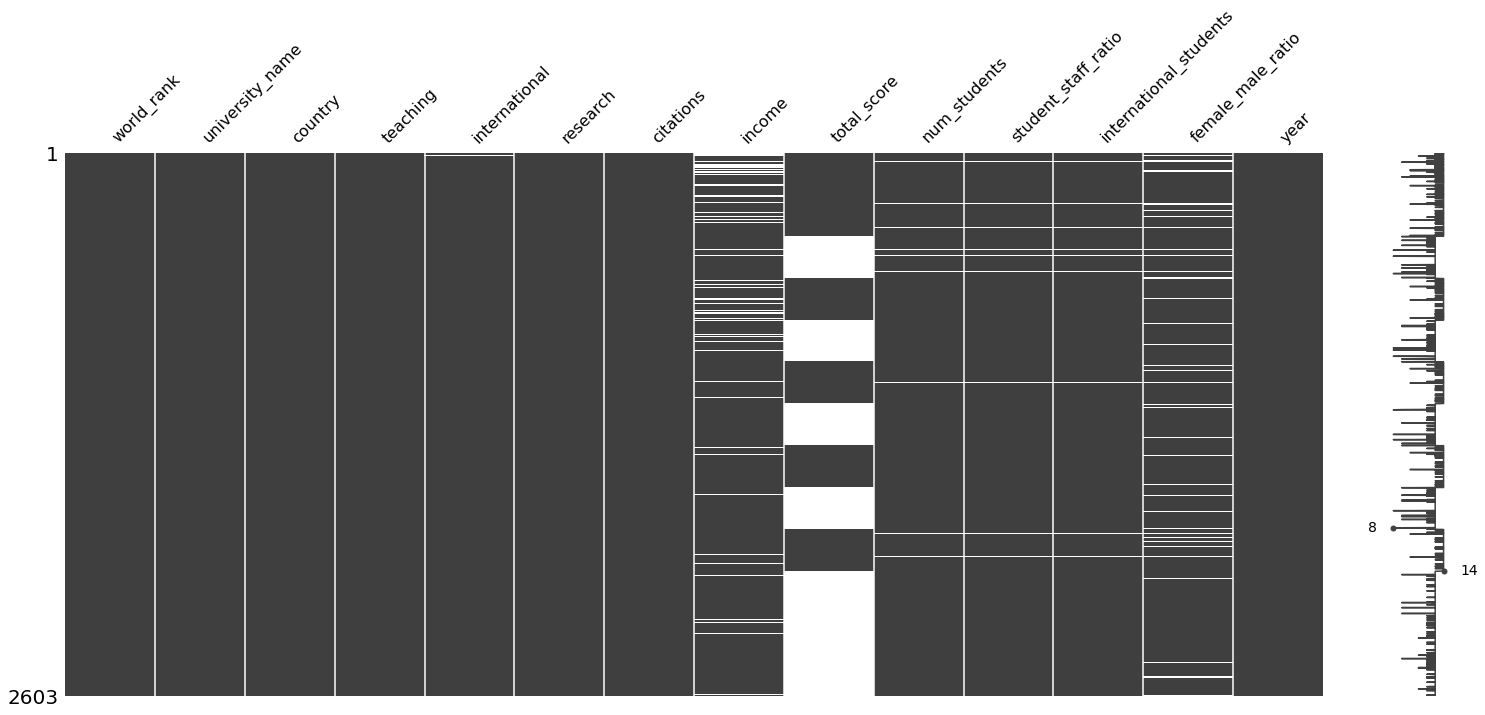

In [8]:
msn.matrix(df)

<AxesSubplot:>

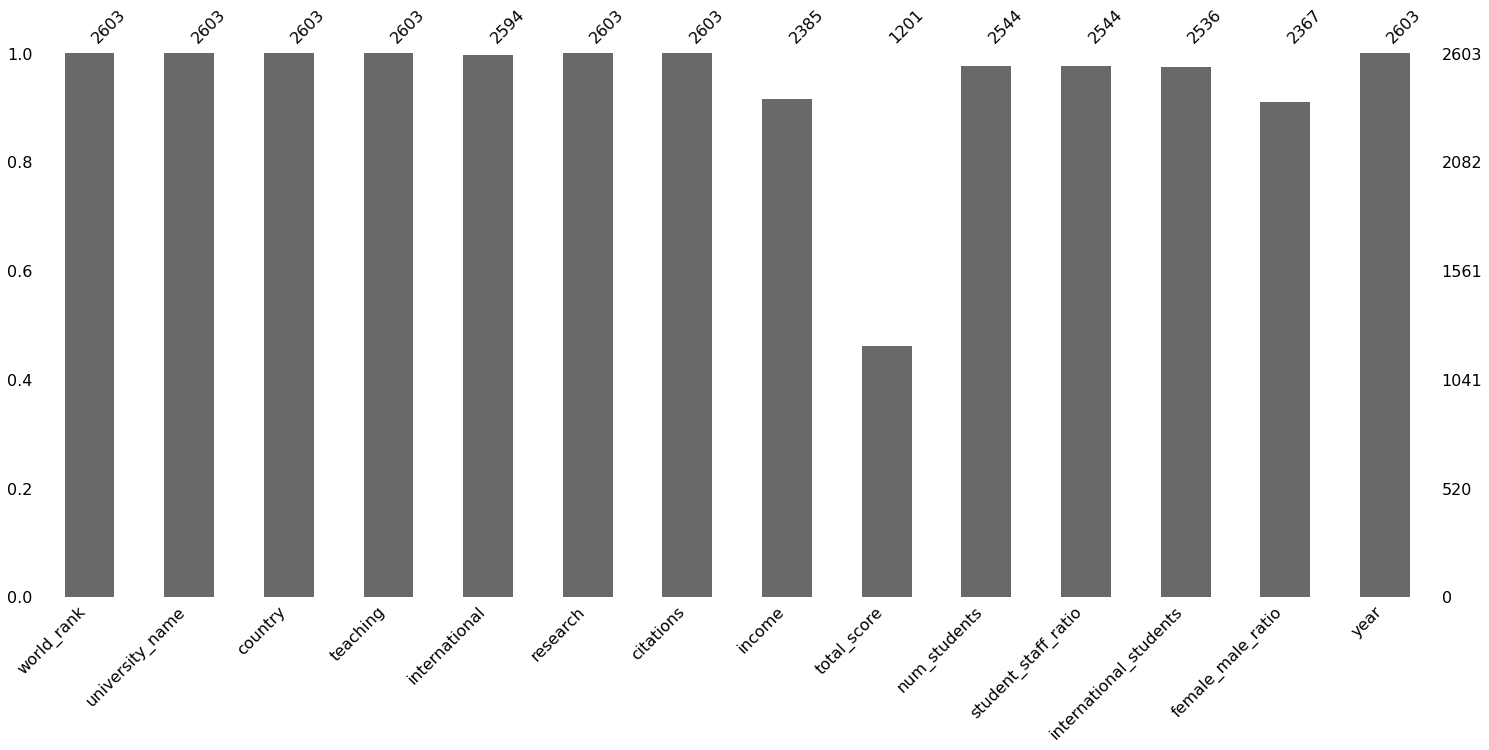

In [9]:
msn.bar(df)

In [10]:
df.isnull().sum()/df.shape[0]

world_rank                0.000000
university_name           0.000000
country                   0.000000
teaching                  0.000000
international             0.003458
research                  0.000000
citations                 0.000000
income                    0.083750
total_score               0.538609
num_students              0.022666
student_staff_ratio       0.022666
international_students    0.025740
female_male_ratio         0.090665
year                      0.000000
dtype: float64

In [11]:
df.drop('total_score', axis = 1, inplace = True)

In [12]:
df['income'].fillna(df['income'].median(), inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   float64
 8   num_students            2544 non-null   float64
 9   student_staff_ratio     2544 non-null   float64
 10  international_students  2536 non-null   object 
 11  female_male_ratio       2367 non-null   object 
 12  year                    2603 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 264.5+ KB


In [14]:
df.rename(columns = {"international_students" : "international_students_per" }, inplace = True)

In [15]:
df.loc[df['international_students_per'].notnull(), 'international_students_per'] = df.loc[df['international_students_per'].notnull(), 'international_students_per'].map(lambda x: int(x.replace("%", "")))

In [16]:
df.head(10)

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching  international  research  citations  income  num_students  \
0      99.7           72.4      98.7       98.8    34.5       20152.0   
1      97.7           54.6      98.0       99.9    83.7        2243.0   
2      97.8           82.3      91.4       99.9    87.5       11074.0   
3      98.3           29.5      98.1       99.2    64.3       15596.0   
4      90.9           70.3      95.4       99.9    41.0        7929.0   
5      90.5           77.7      94.1       94.0    57.0       18812.0   
6      88.2           77.2      93.9       95.1    73.5       19919.0   
7      84.2           39.6      99.3       97.8    41.0       36186.0   
8      89.2           90.0      94.5       88.3    92.9       15060.0   
9      92.1           59.2      89.7       91.5    41.0       11751.0   

   student_staff_ratio international_students_per female_male_ratio  year  
0                  8.9                         25               NaN  2011  
1                  6.9                         27           33 : 67  2011  
2                  9.0                         33           37 : 63  2011  
3                  7.8                         22           42 : 58  2011  
4                  8.4                         27           45 : 55  2011  
5                 11.8                         34           46 : 54  2011  
6                 11.6                         34           46 : 54  2011  
7                 16.4                         15           50 : 50  2011  
8                 11.7                         51           37 : 63  2011  
9                  4.4                         20           50 : 50  2011

In [17]:
df.describe()

teaching  international     research    citations       income  \
count  2603.000000    2594.000000  2603.000000  2603.000000  2603.000000   
mean     37.801498      52.007440    35.910257    60.921629    48.311564   
std      17.604218      22.103825    21.254805    23.073219    20.393490   
min       9.900000       7.100000     2.900000     1.200000    24.200000   
25%      24.700000      33.425000    19.600000    45.500000    33.600000   
50%      33.900000      50.300000    30.500000    62.500000    41.000000   
75%      46.400000      69.000000    47.250000    79.050000    56.000000   
max      99.700000     100.000000    99.400000   100.000000   100.000000   

        num_students  student_staff_ratio         year  
count    2544.000000          2544.000000  2603.000000  
mean    23873.758648            18.445283  2014.075682  
std     17675.946877            11.458698     1.685733  
min       462.000000             0.600000  2011.000000  
25%     12637.750000            11.975000  2013.000000  
50%     20851.000000            16.100000  2014.000000  
75%     29991.000000            21.500000  2016.000000  
max    379231.000000           162.600000  2016.000000

In [18]:


df['size'] = df['num_students'].map(lambda x: 'Large' if x > 15000 else "Small")

In [19]:
df['num_students'].fillna(df['num_students'].median(), inplace = True)

In [20]:
df['num_students'].median()

20851.0

In [21]:
df.loc[df['country'] == 'Unisted States of America','country'] = 'United States of America'
df.loc[df['country'] == "Unted Kingdom",'country'] = "United Kingdom"


### Male - Female Students

In [22]:
df['male_per'] =  df['female_male_ratio'].map(lambda x: int(x.split(":")[1] if x not in ('NaN', np.nan, None) else 0))

In [23]:
df['female_per'] =  df['female_male_ratio'].map(lambda x: int(x.split(":")[0] if x not in ('NaN', np.nan, None) else 0))

In [24]:
df['male_num'] = ((df['num_students'] * df['male_per'])//100).astype('int32')

In [25]:
df['female_num'] = ((df['num_students'] * df['female_per'])//100).astype('int32')

In [26]:
df.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching  international  research  citations  income  num_students  \
0      99.7           72.4      98.7       98.8    34.5       20152.0   
1      97.7           54.6      98.0       99.9    83.7        2243.0   
2      97.8           82.3      91.4       99.9    87.5       11074.0   
3      98.3           29.5      98.1       99.2    64.3       15596.0   
4      90.9           70.3      95.4       99.9    41.0        7929.0   

   student_staff_ratio international_students_per female_male_ratio  year  \
0                  8.9                         25               NaN  2011   
1                  6.9                         27           33 : 67  2011   
2                  9.0                         33           37 : 63  2011   
3                  7.8                         22           42 : 58  2011   
4                  8.4                         27           45 : 55  2011   

    size  male_per  female_per  male_num  female_num  
0  Large         0           0         0           0  
1  Small        67          33      1502         740  
2  Small        63          37      6976        4097  
3  Large        58          42      9045        6550  
4  Small        55          45      4360        3568

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   world_rank                  2603 non-null   object 
 1   university_name             2603 non-null   object 
 2   country                     2603 non-null   object 
 3   teaching                    2603 non-null   float64
 4   international               2594 non-null   float64
 5   research                    2603 non-null   float64
 6   citations                   2603 non-null   float64
 7   income                      2603 non-null   float64
 8   num_students                2603 non-null   float64
 9   student_staff_ratio         2544 non-null   float64
 10  international_students_per  2536 non-null   object 
 11  female_male_ratio           2367 non-null   object 
 12  year                        2603 non-null   int64  
 13  size                        2603 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   world_rank                  2603 non-null   object 
 1   university_name             2603 non-null   object 
 2   country                     2603 non-null   object 
 3   teaching                    2603 non-null   float64
 4   international               2594 non-null   float64
 5   research                    2603 non-null   float64
 6   citations                   2603 non-null   float64
 7   income                      2603 non-null   float64
 8   num_students                2603 non-null   float64
 9   student_staff_ratio         2544 non-null   float64
 10  international_students_per  2536 non-null   object 
 11  female_male_ratio           2367 non-null   object 
 12  year                        2603 non-null   int64  
 13  size                        2603 

# Visualizing


In [29]:
df.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching  international  research  citations  income  num_students  \
0      99.7           72.4      98.7       98.8    34.5       20152.0   
1      97.7           54.6      98.0       99.9    83.7        2243.0   
2      97.8           82.3      91.4       99.9    87.5       11074.0   
3      98.3           29.5      98.1       99.2    64.3       15596.0   
4      90.9           70.3      95.4       99.9    41.0        7929.0   

   student_staff_ratio international_students_per female_male_ratio  year  \
0                  8.9                         25               NaN  2011   
1                  6.9                         27           33 : 67  2011   
2                  9.0                         33           37 : 63  2011   
3                  7.8                         22           42 : 58  2011   
4                  8.4                         27           45 : 55  2011   

    size  male_per  female_per  male_num  female_num  
0  Large         0           0         0           0  
1  Small        67          33      1502         740  
2  Small        63          37      6976        4097  
3  Large        58          42      9045        6550  
4  Small        55          45      4360        3568

In [30]:
# Data Year Coverage
range_year = df['year'].unique()

print(f"Data year coverage :{range_year[0]} - {range_year[-1]}")

Data year coverage :2011 - 2016


In [31]:
df_2011 = df[df['year'] == 2011]

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

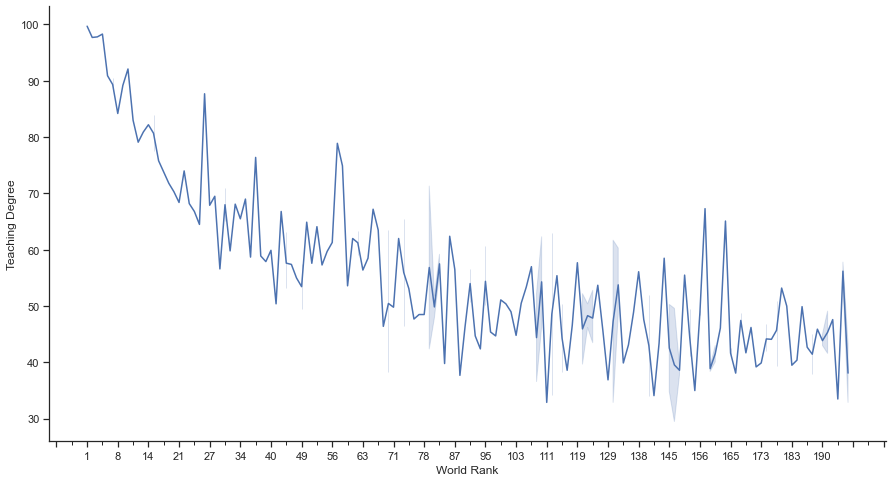

In [33]:
fig, ax = plt.subplots()
sns.lineplot(x = 'world_rank', y = 'teaching', data = df_2011, ax = ax)
#ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(3))

ax.set_xlabel("World Rank")
ax.set_ylabel("Teaching Degree")

plt.show()

In [34]:
top_100_university = df.head(100)

In [35]:
top_100_university.head(100)

world_rank                        university_name  \
0           1                     Harvard University   
1           2     California Institute of Technology   
2           3  Massachusetts Institute of Technology   
3           4                    Stanford University   
4           5                   Princeton University   
..        ...                                    ...   
95         95                  University of Arizona   
96         95                    University of Basel   
97         98   University of Maryland, College Park   
98         99                      Dartmouth College   
99        100       École Normale Supérieure de Lyon   

                     country  teaching  international  research  citations  \
0   United States of America      99.7           72.4      98.7       98.8   
1   United States of America      97.7           54.6      98.0       99.9   
2   United States of America      97.8           82.3      91.4       99.9   
3   United States of America      98.3           29.5      98.1       99.2   
4   United States of America      90.9           70.3      95.4       99.9   
..                       ...       ...            ...       ...        ...   
95  United States of America      52.4           21.9      52.2       70.1   
96               Switzerland      50.2           91.3      37.1       78.3   
97  United States of America      45.4           35.4      48.6       79.2   
98  United States of America      44.7           31.0      49.2       79.7   
99                    France      51.1           37.6      34.4       88.8   

    income  num_students  student_staff_ratio international_students_per  \
0     34.5       20152.0                  8.9                         25   
1     83.7        2243.0                  6.9                         27   
2     87.5       11074.0                  9.0                         33   
3     64.3       15596.0                  7.8                         22   
4     41.0        7929.0                  8.4                         27   
..     ...           ...                  ...                        ...   
95    84.2       36429.0                 12.7                          8   
96    45.8       12551.0                 17.3                         24   
97    41.0       31331.0                  8.4                          9   
98    41.0        6178.0                  6.6                         16   
99    26.1        2218.0                  8.0                         14   

   female_male_ratio  year   size  male_per  female_per  male_num  female_num  
0                NaN  2011  Large         0           0         0           0  
1            33 : 67  2011  Small        67          33      1502         740  
2            37 : 63  2011  Small        63          37      6976        4097  
3            42 : 58  2011  Large        58          42      9045        6550  
4            45 : 55  2011  Small        55          45      4360        3568  
..               ...   ...    ...       ...         ...       ...         ...  
95           52 : 48  2011  Large        48          52     17485       18943  
96           54 : 46  2011  Small        46          54      5773        6777  
97           48 : 52  2011  Large        52          48     16292       15038  
98           47 : 53  2011  Small        53          47      3274        2903  
99           49 : 51  2011  Small        51          49      1131        1086  

[100 rows x 18 columns]

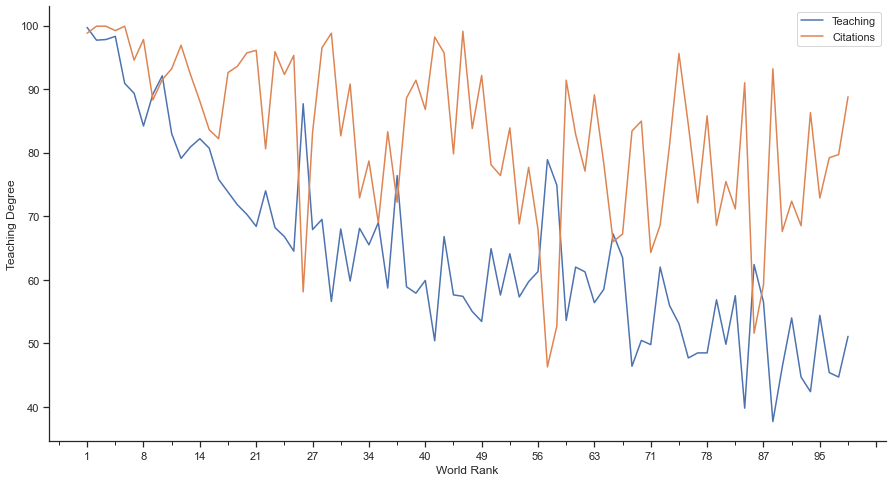

In [36]:
fig, ax = plt.subplots()

sns.lineplot(x = 'world_rank', y = 'teaching', data = top_100_university, label = 'Teaching',err_style = None, ax = ax)
sns.lineplot(x = 'world_rank', y = 'citations', data = top_100_university,  label = 'Citations', err_style = None, ax= ax)

ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(3))

ax.set_xlabel("World Rank")
ax.set_ylabel("Teaching Degree")

plt.legend()
plt.show()

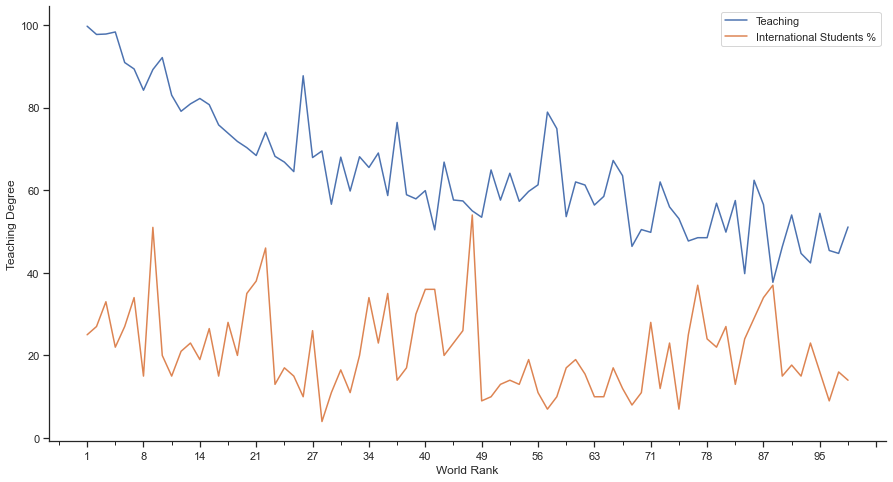

In [37]:

fig, ax = plt.subplots()

sns.lineplot(x = 'world_rank', y = 'teaching', data = top_100_university, label = 'Teaching',err_style = None, ax = ax)
sns.lineplot(x = 'world_rank', y = 'international_students_per', data = top_100_university,  label = 'International Students %', err_style = None, ax= ax)

ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(3))

ax.set_xlabel("World Rank")
ax.set_ylabel("Teaching Degree")

plt.legend()
plt.show()

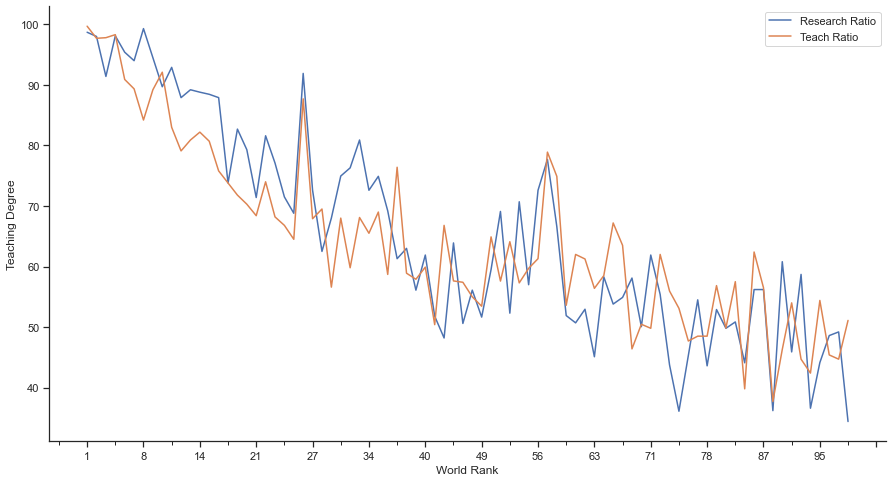

In [38]:

fig, ax = plt.subplots()

sns.lineplot(x = 'world_rank', y = 'research', data = top_100_university, label = 'Research Ratio',err_style = None, ax = ax)
sns.lineplot(x = 'world_rank', y = 'teaching', data = top_100_university, label = 'Teach Ratio',err_style = None, ax = ax)

ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(3))

ax.set_xlabel("World Rank")
ax.set_ylabel("Teaching Degree")

plt.legend()
plt.show()


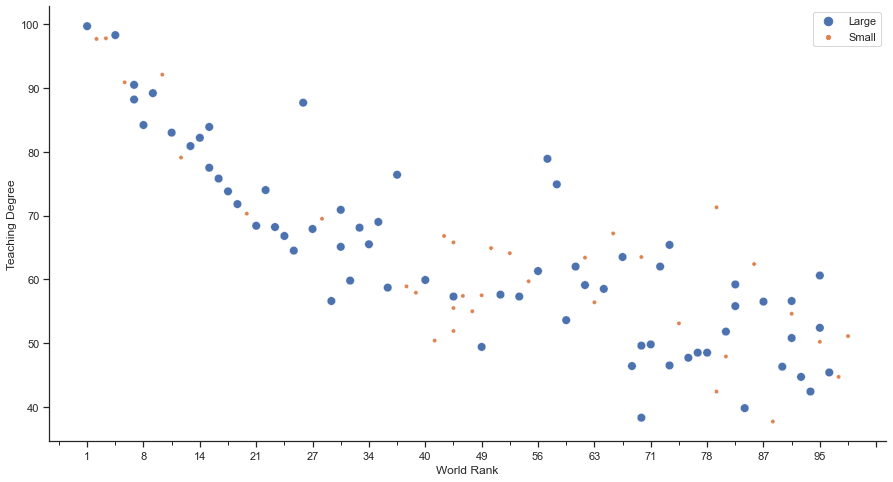

In [39]:

# Connection Between University Ranks and Teaching Degree

fig, ax = plt.subplots()

sns.scatterplot(data=top_100_university, x='world_rank', y="teaching", size = "size" , hue="size")

ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(3))

ax.set_xlabel("World Rank")
ax.set_ylabel("Teaching Degree")

plt.legend()
plt.show()



In [40]:
usa_data = df[df['country'] == 'United States of America']

In [41]:
usa_count = usa_data.groupby('year')['world_rank'].count()

<AxesSubplot:xlabel='year'>

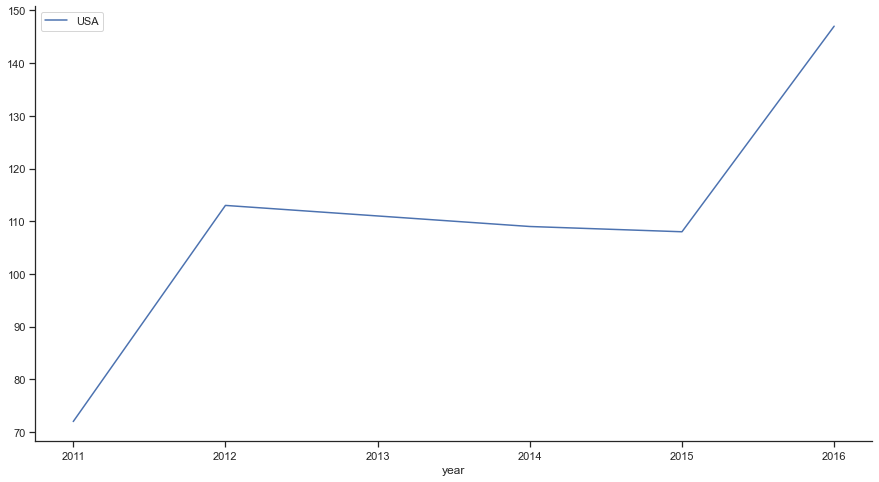

In [42]:
sns.lineplot(x = usa_count.index, y = usa_count.values, label = "USA")


In [43]:
# Getting all the countries represented in a data
countries = df['country'].unique()
countries

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Cyprus', 'Uganda', 'Malaysia', 'Lebanon',
       'Romania', 'Slovenia', 'Pakistan', 'Hungary',
       'United Arab Emirates', 'Belarus', 'Serbia', 'Slovakia',
       'Bangladesh', 'Ghana', 'Nigeria', 'Indonesia', 'Jordan', 'Latvia',
       'Kenya', 'Argentina', 'Qatar', 'Oman', 'Ukraine', 'Lithuania'],
      dtype=object)

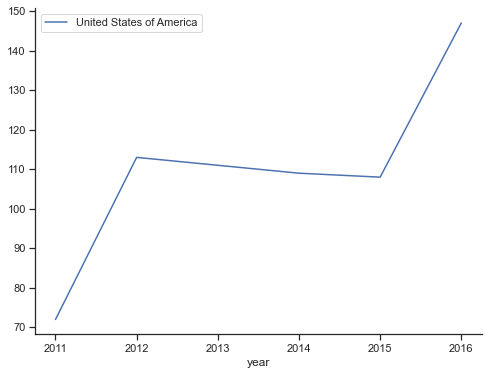

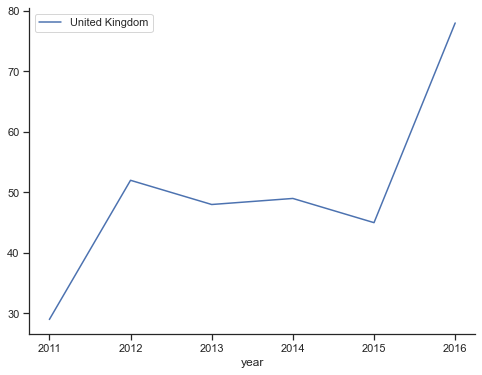

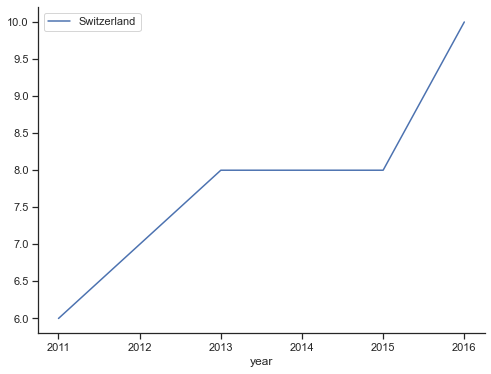

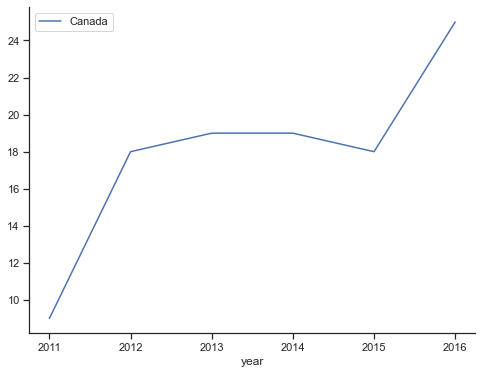

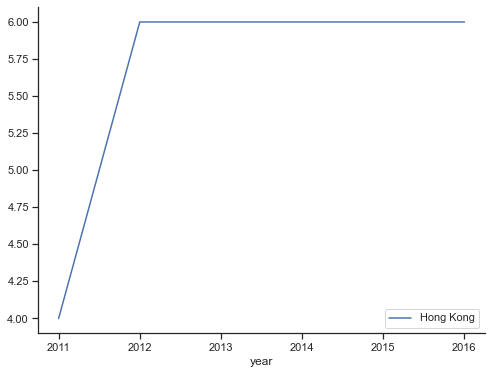

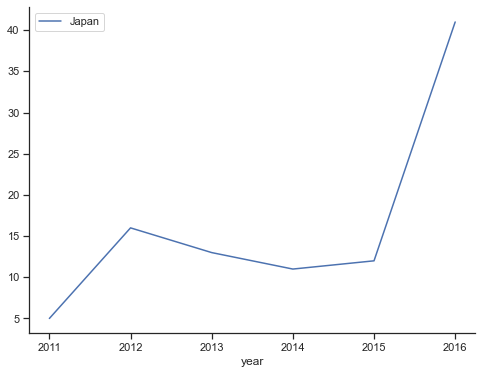

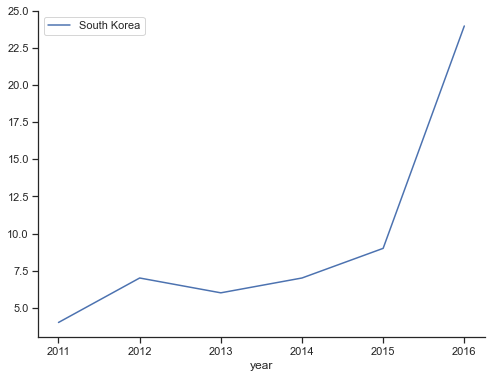

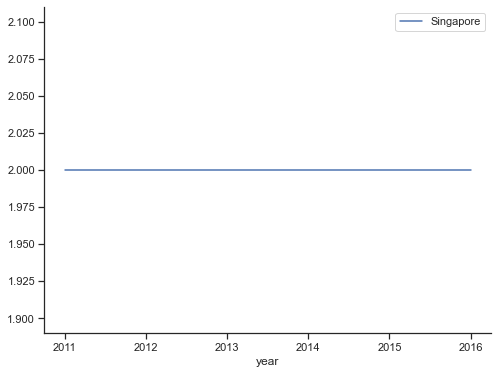

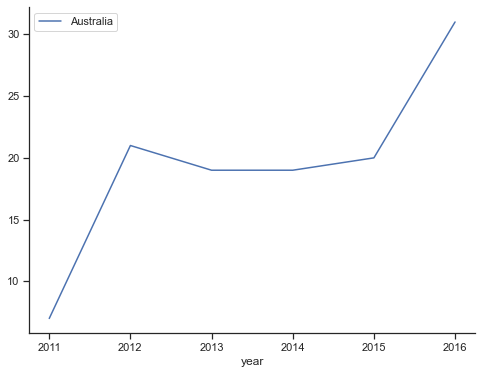

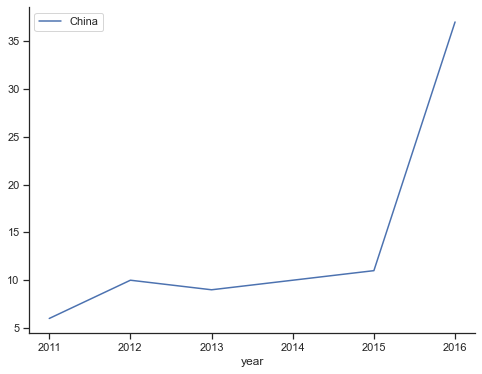

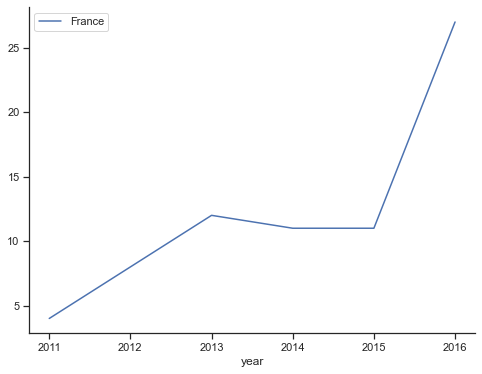

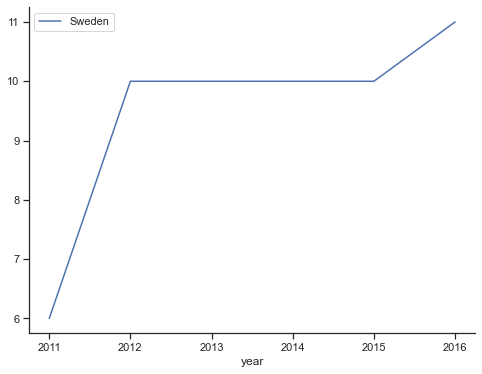

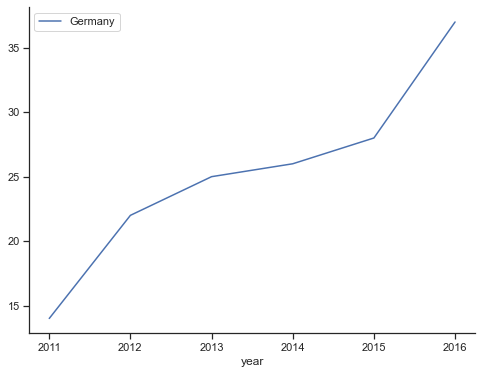

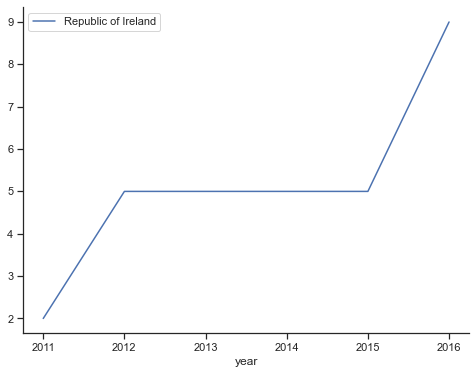

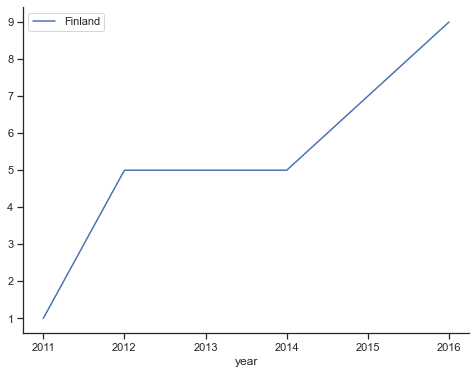

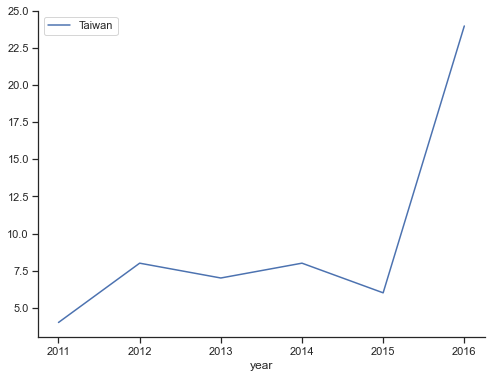

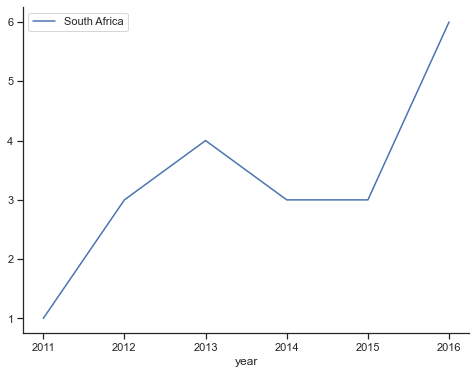

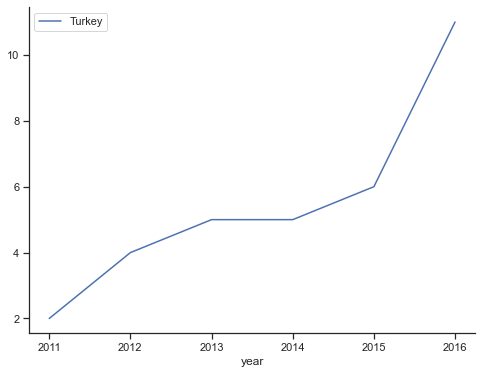

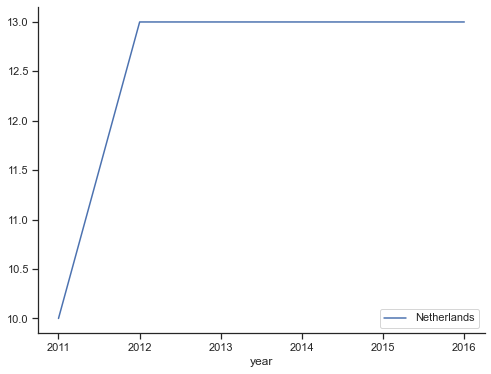

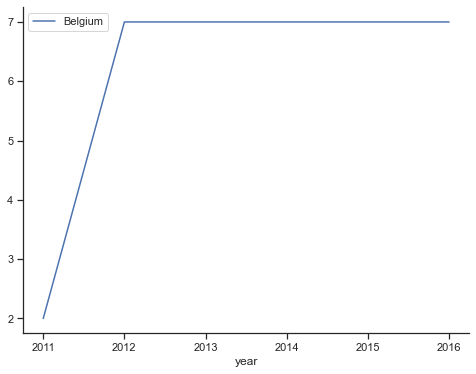

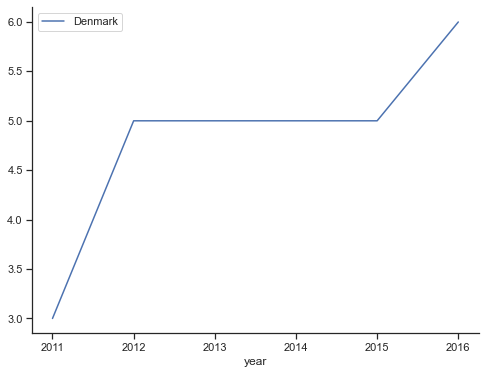

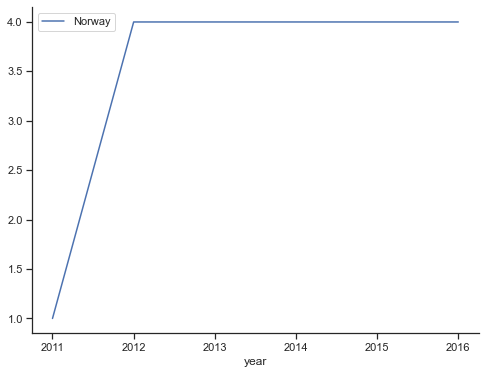

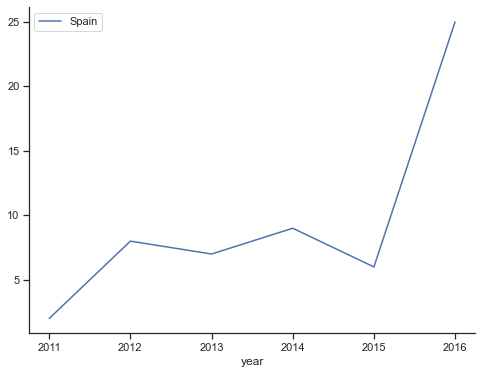

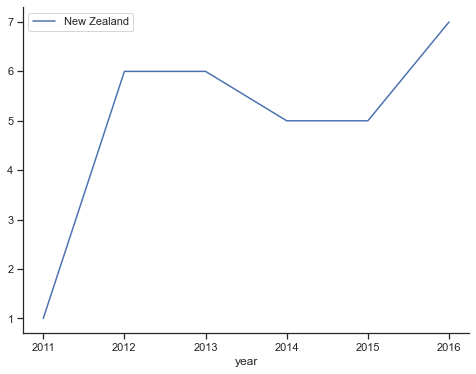

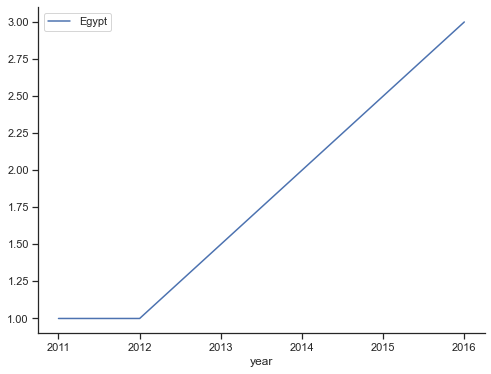

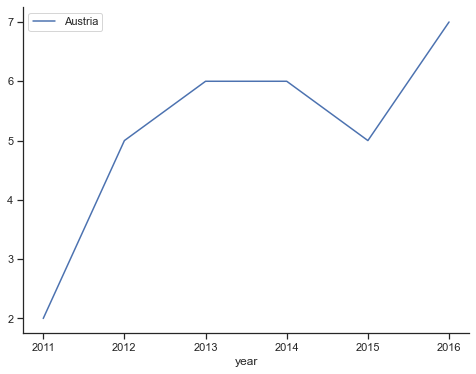

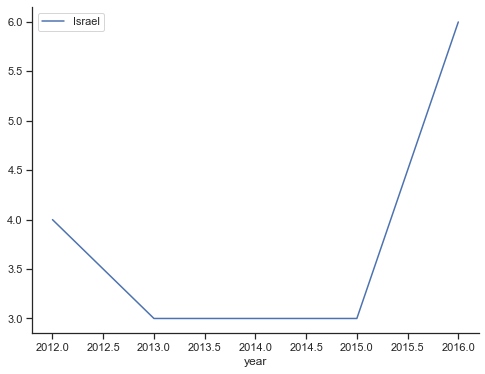

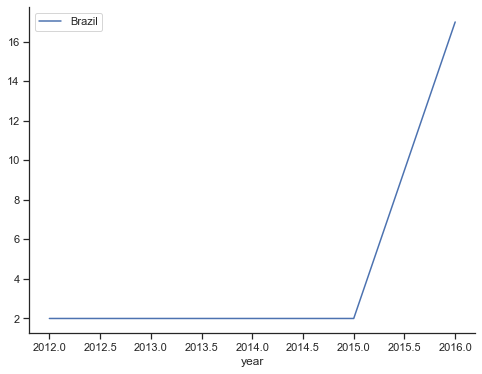

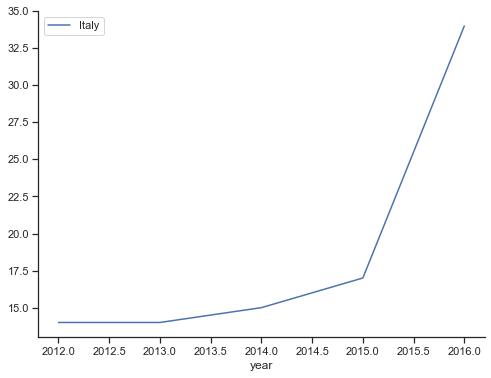

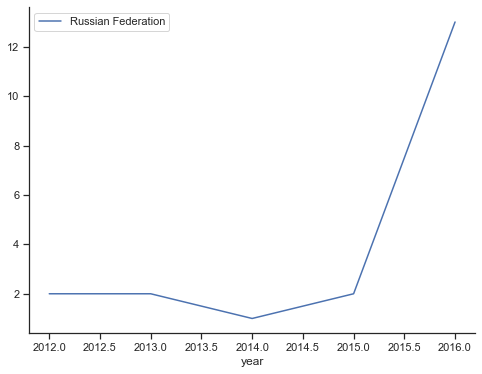

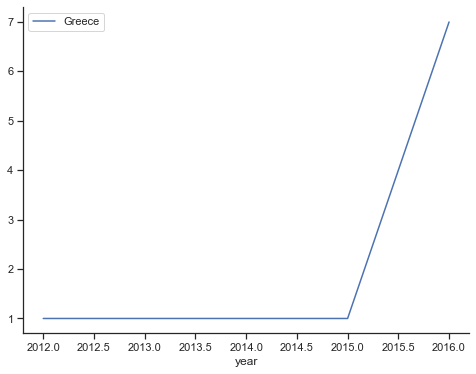

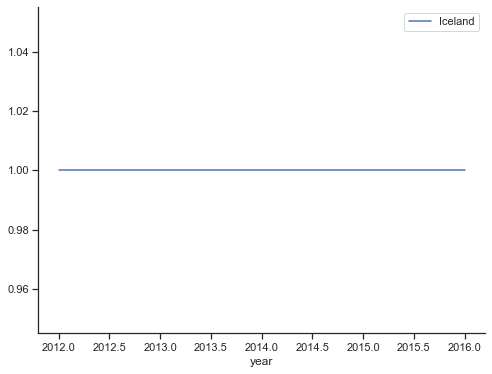

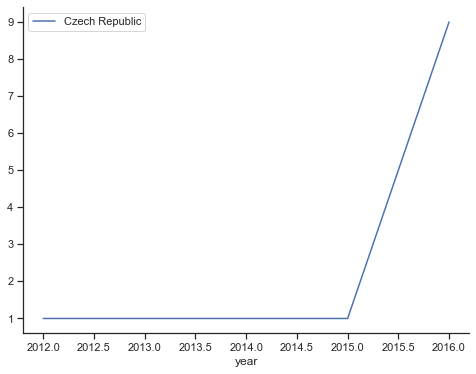

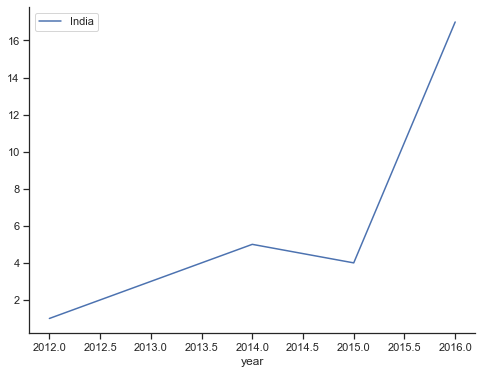

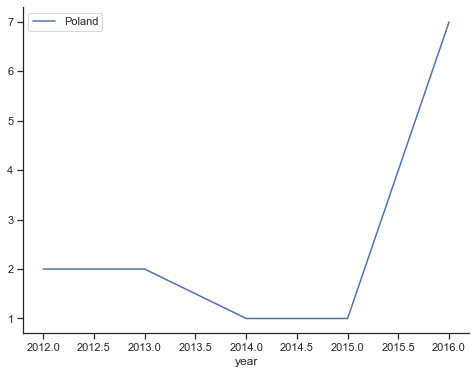

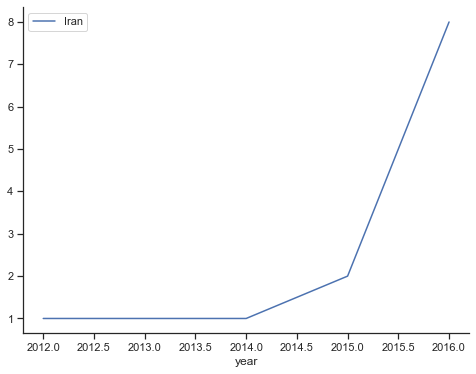

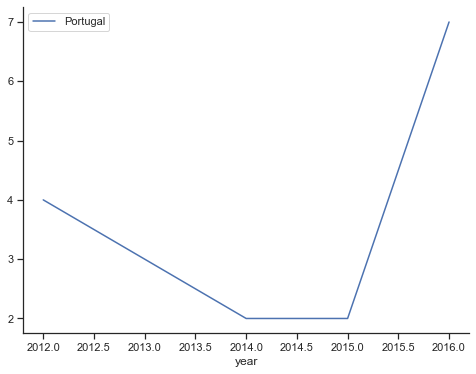

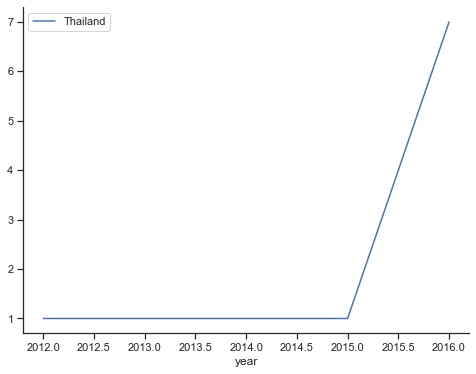

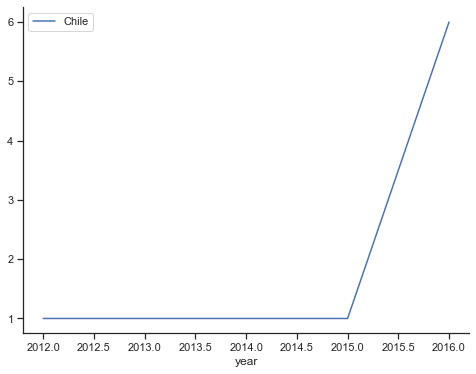

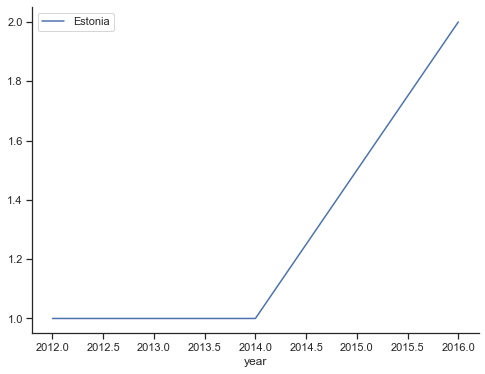

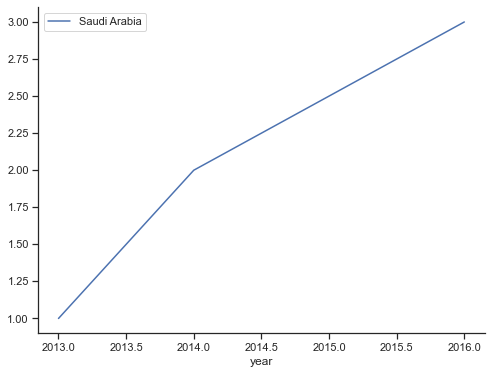

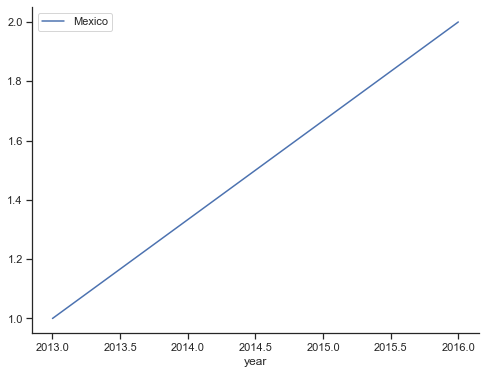

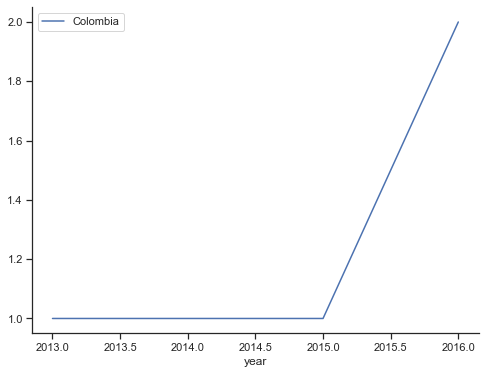

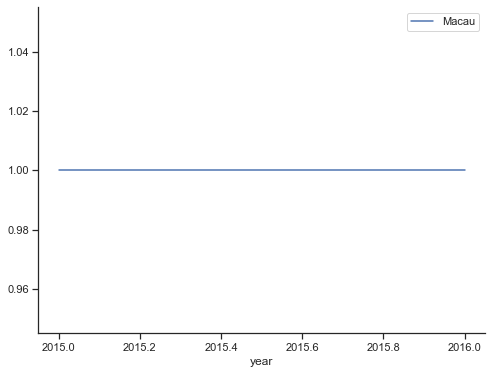

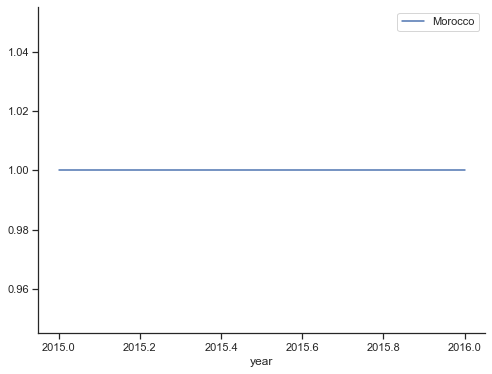

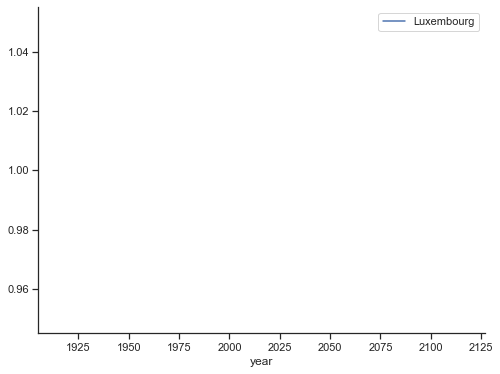

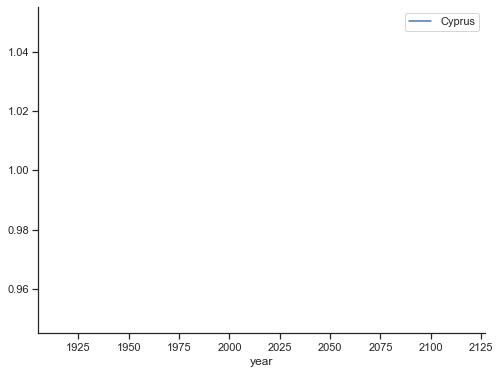

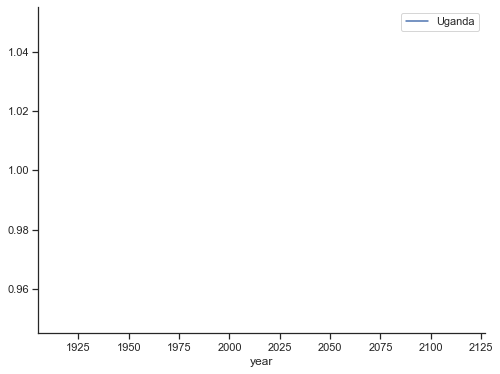

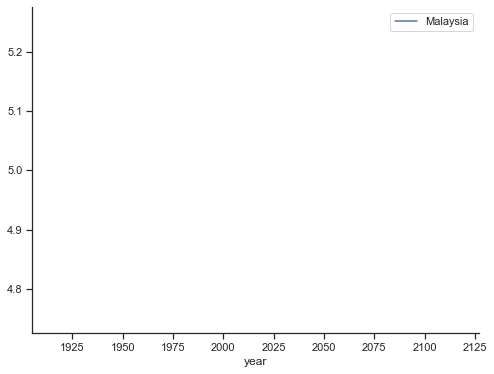

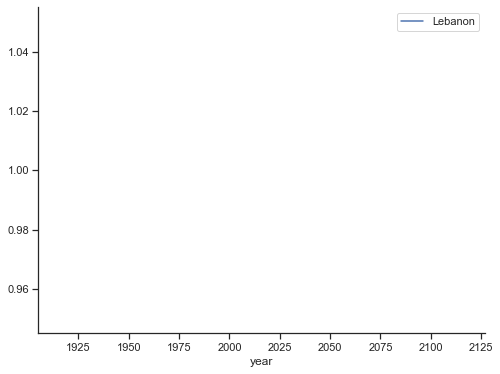

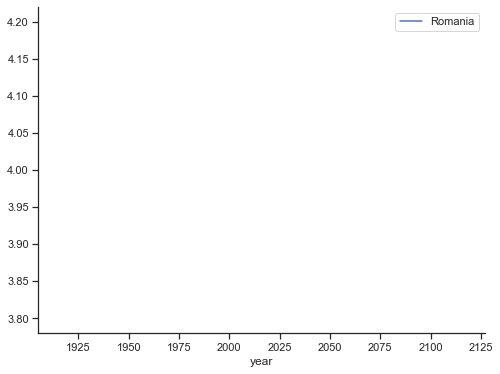

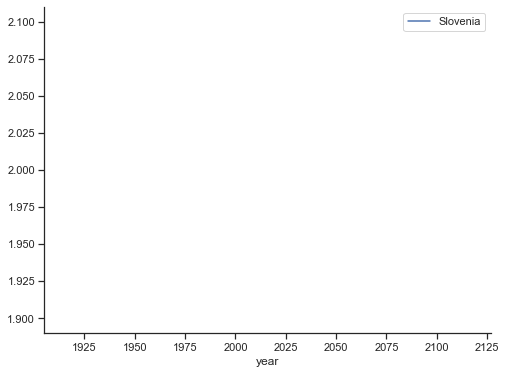

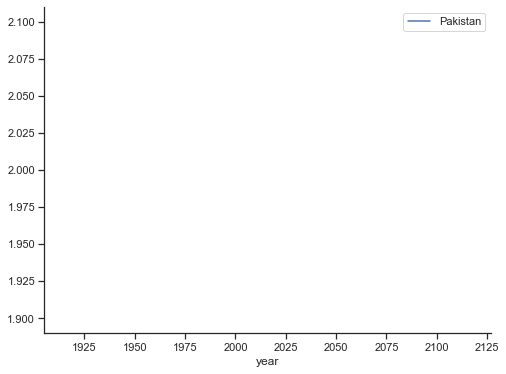

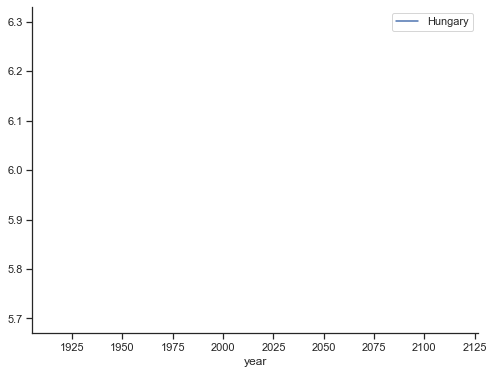

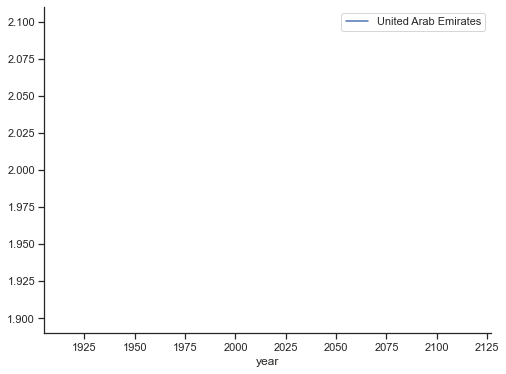

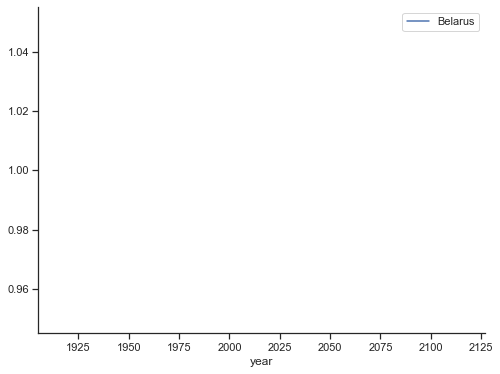

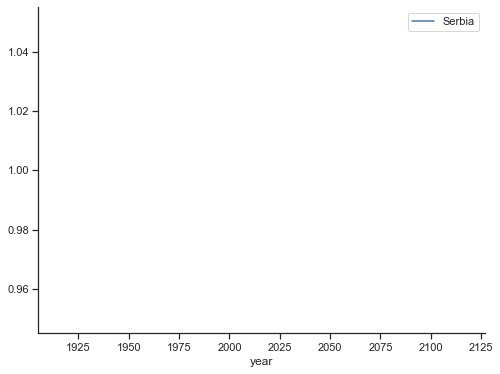

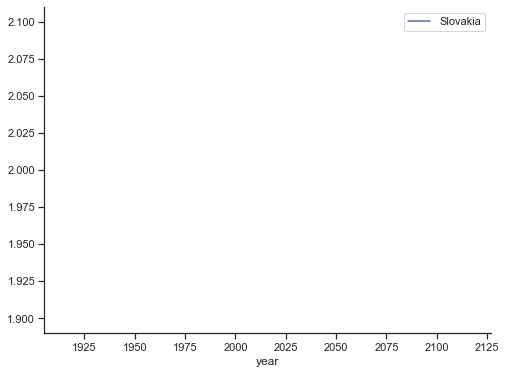

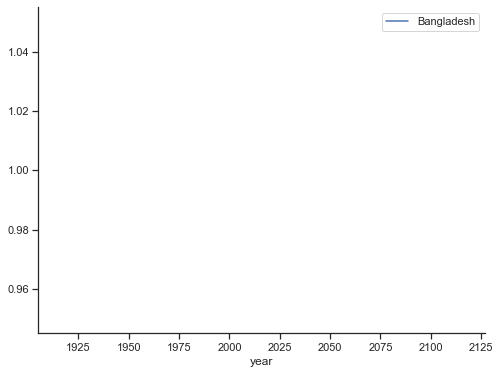

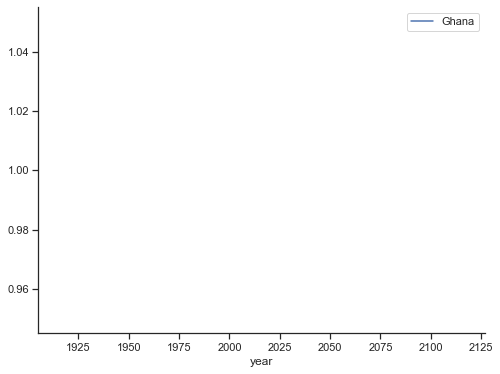

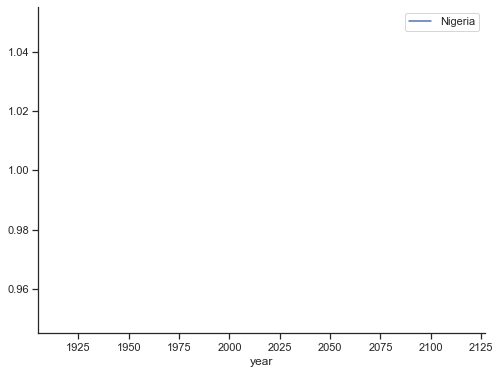

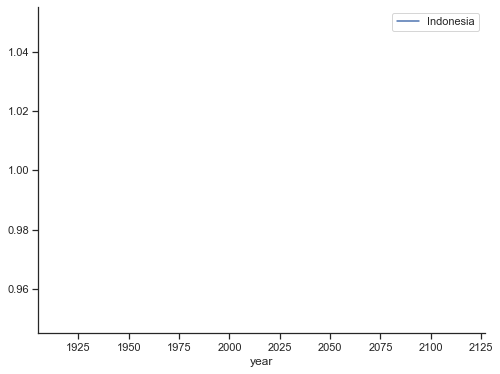

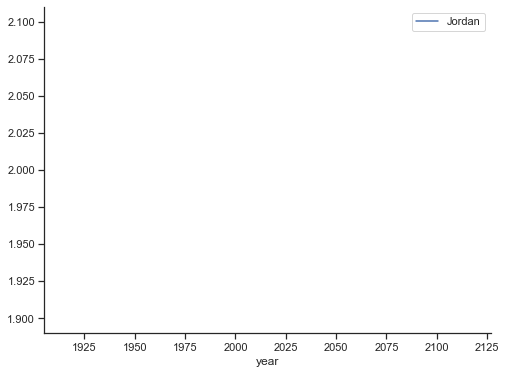

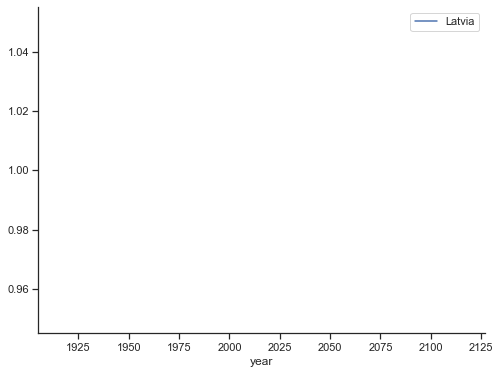

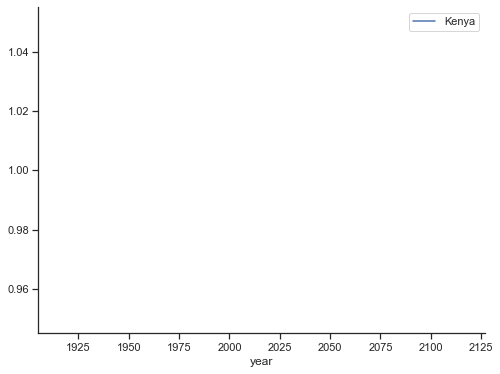

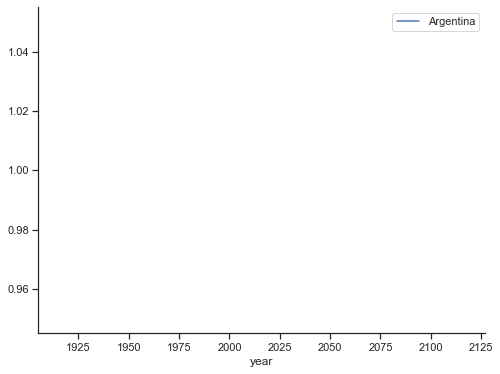

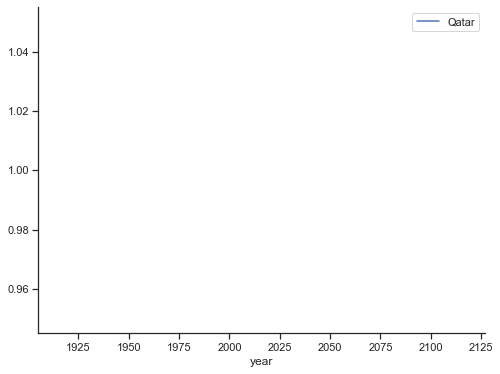

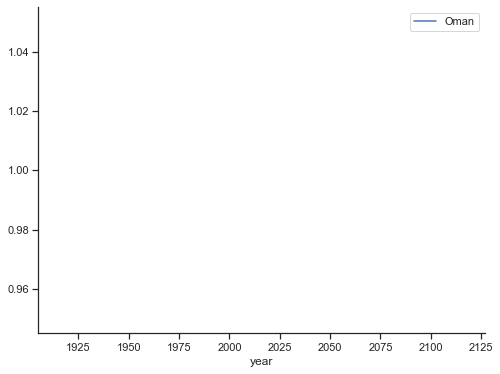

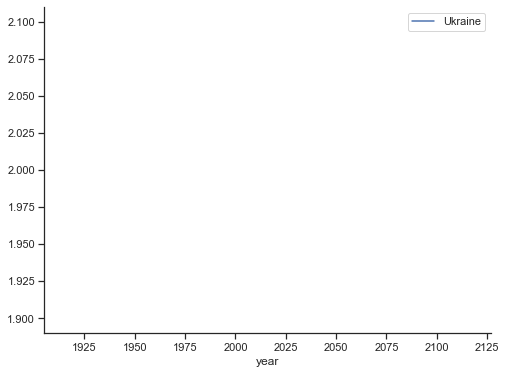

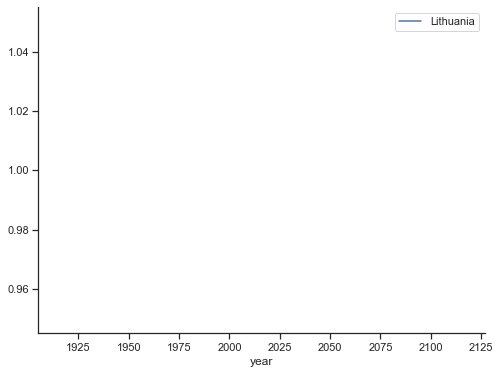

In [44]:
# All the countries university representation over the years

for country in countries:
    country_data= df[df['country'] == country]
    country_count = country_data.groupby('year')['world_rank'].count()
    sns.lineplot(x = country_count.index, y = country_count.values, label = country)
    plt.gcf().set_size_inches(8, 6)
    plt.show()

In [45]:
mit_data = df[df['university_name'] == 'Massachusetts Institute of Technology']
mit_data.sort_values('world_rank', inplace = True)

In [46]:
mit_data

world_rank                        university_name  \
2             3  Massachusetts Institute of Technology   
606           5  Massachusetts Institute of Technology   
1006          5  Massachusetts Institute of Technology   
1807          5  Massachusetts Institute of Technology   
1407          6  Massachusetts Institute of Technology   
206           7  Massachusetts Institute of Technology   

                       country  teaching  international  research  citations  \
2     United States of America      97.8           82.3      91.4       99.9   
606   United States of America      92.9           81.6      89.2       99.9   
1006  United States of America      92.9           82.0      89.0      100.0   
1807  United States of America      89.4           84.0      88.6       99.7   
1407  United States of America      89.1           84.3      88.2      100.0   
206   United States of America      92.7           79.2      87.4      100.0   

      income  num_students  student_staff_ratio international_students_per  \
2       87.5       11074.0                  9.0                         33   
606     92.9       11074.0                  9.0                         33   
1006    94.3       11074.0                  9.0                         33   
1807    95.4       11074.0                  9.0                         33   
1407    95.7       11074.0                  9.0                         33   
206     94.4       11074.0                  9.0                         33   

     female_male_ratio  year   size  male_per  female_per  male_num  \
2              37 : 63  2011  Small        63          37      6976   
606            37 : 63  2013  Small        63          37      6976   
1006           37 : 63  2014  Small        63          37      6976   
1807           37 : 63  2016  Small        63          37      6976   
1407           37 : 63  2015  Small        63          37      6976   
206            37 : 63  2012  Small        63          37      6976   

      female_num  
2           4097  
606         4097  
1006        4097  
1807        4097  
1407        4097  
206         4097

<AxesSubplot:xlabel='year', ylabel='world_rank'>

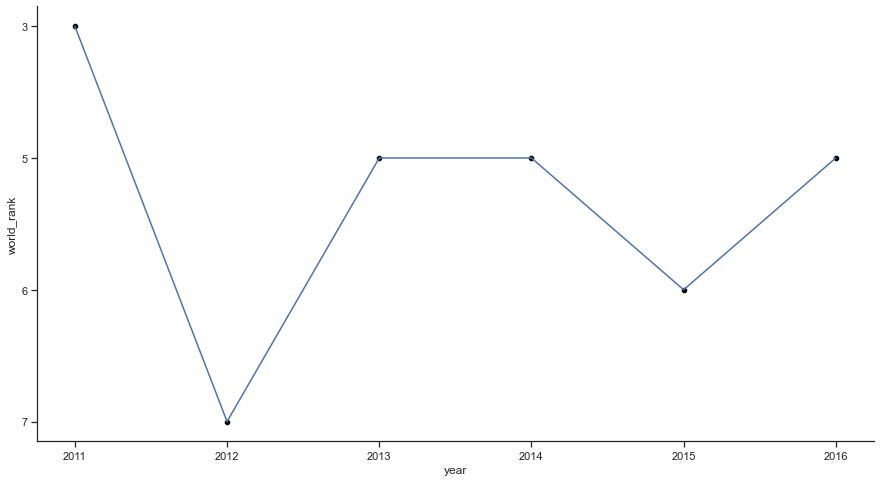

In [47]:
sns.lineplot(y = mit_data['world_rank'], x = mit_data['year'])
sns.scatterplot(y = mit_data['world_rank'], x = mit_data['year'], color = 'black')

In [48]:
df.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching  international  research  citations  income  num_students  \
0      99.7           72.4      98.7       98.8    34.5       20152.0   
1      97.7           54.6      98.0       99.9    83.7        2243.0   
2      97.8           82.3      91.4       99.9    87.5       11074.0   
3      98.3           29.5      98.1       99.2    64.3       15596.0   
4      90.9           70.3      95.4       99.9    41.0        7929.0   

   student_staff_ratio international_students_per female_male_ratio  year  \
0                  8.9                         25               NaN  2011   
1                  6.9                         27           33 : 67  2011   
2                  9.0                         33           37 : 63  2011   
3                  7.8                         22           42 : 58  2011   
4                  8.4                         27           45 : 55  2011   

    size  male_per  female_per  male_num  female_num  
0  Large         0           0         0           0  
1  Small        67          33      1502         740  
2  Small        63          37      6976        4097  
3  Large        58          42      9045        6550  
4  Small        55          45      4360        3568

In [49]:
df[df['year'] == 2016].head(10)

selected_universities = ['California Institute of Technology',  'University of Oxford', 'Stanford University', 'Harvard University' ]


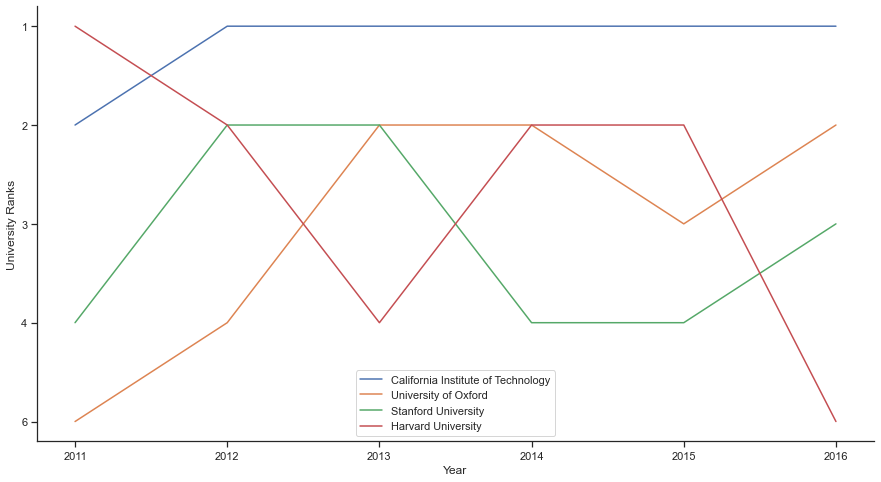

In [50]:
fig,ax = plt.subplots()

for university in selected_universities:    
    selected_uni_data =  df[df['university_name'] == university]
    selected_uni_data.sort_values('world_rank', inplace = True)
    sns.lineplot(y = selected_uni_data['world_rank'], x = selected_uni_data['year'], ax = ax, label = university)

ax.set_ylabel('University Ranks')
ax.set_xlabel('Year')
    
plt.show()
    

### Visualizing using Maps


In [51]:
geolocator = Nominatim(user_agent = 'Universities')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [52]:
country_geolocations = {}

for country in countries:
    
    new_lat, new_long = geolocate(country)
    country_geolocations[country] = [new_lat, new_long]


In [54]:
country_geolocations

{'United States of America': [39.7837304, -100.445882],
 'United Kingdom': [54.7023545, -3.2765753],
 'Switzerland': [46.7985624, 8.2319736],
 'Canada': [61.0666922, -107.991707],
 'Hong Kong': [22.2793278, 114.1628131],
 'Japan': [36.5748441, 139.2394179],
 'South Korea': [36.638392, 127.6961188],
 'Singapore': [1.357107, 103.8194992],
 'Australia': [-24.7761086, 134.755],
 'China': [35.000074, 104.999927],
 'France': [46.603354, 1.8883335],
 'Sweden': [59.6749712, 14.5208584],
 'Germany': [51.0834196, 10.4234469],
 'Republic of Ireland': [52.865196, -7.9794599],
 'Finland': [63.2467777, 25.9209164],
 'Taiwan': [23.9739374, 120.9820179],
 'South Africa': [-28.8166236, 24.991639],
 'Turkey': [38.9597594, 34.9249653],
 'Netherlands': [52.2288689, 5.3214503],
 'Belgium': [50.6402809, 4.6667145],
 'Denmark': [55.670249, 10.3333283],
 'Norway': [60.5000209, 9.0999715],
 'Spain': [39.3260685, -4.8379791],
 'New Zealand': [-41.5000831, 172.8344077],
 'Egypt': [26.2540493, 29.2675469],
 'Aust

In [55]:
# Getting needed geolocation information
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [56]:
def plot_map(data, cols, legend_text, fill_col = 'YlGnBu', rad = 7  ):
    m = folium.Map()

    
    folium.Choropleth(
        #The GeoJSON data to represent the world country
        geo_data = country_shapes ,
        name=f"{legend_text}",
        data=data,
        #The column aceppting list with 2 value; The country name and  the numerical value
        columns=cols,
        key_on='feature.properties.name',
        fill_color= fill_col,
        nan_fill_color='white',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = legend_text
    ).add_to(m)
    
    #empty map

    marker_cluster = MarkerCluster().add_to(m)
    #for each coordinate, create circlemarker of user percent
    for i in range(len(data)):
            lat = data.iloc[i]['lat']
            long = data.iloc[i]['long']
            radius=rad
            popup_text = "Country : {}<br> <br> Universities Count : {}<br>"
            popup_text = popup_text.format(data.iloc[i][cols[0]],
                                       data.iloc[i][cols[1]]
                                       )
            folium.CircleMarker(location = [lat, long],tooltip=popup_text ,radius=radius, popup= popup_text, fill =False).add_to(marker_cluster)
    #show the map
    return m

    


In [59]:
# Plotting  maps for each year
m_dat = []

for year in range_year:
    
    lat, long = [], []
    temp_yearly_data = pd.DataFrame(df[df['year'] == year].groupby('country')['world_rank'].count())
    temp_yearly_data.reset_index(inplace = True)

    for country in temp_yearly_data['country']:
        lat_info, long_info = country_geolocations[country]
        lat.append(lat_info)
        long.append(long_info)
    
    temp_yearly_data['lat'] , temp_yearly_data['long'] = lat, long
    maps = plot_map(temp_yearly_data, ['country', 'world_rank'], f'{year} Count:')
        
    m_dat.append(maps)

In [60]:
m_dat[0]

In [61]:
m_dat[1]

In [62]:
m_dat[2]

In [63]:
m_dat[3]

In [64]:
m_dat[4]

In [65]:
m_dat[5]

In [66]:
def plot_pie(data, keys,country, year):
    plt.pie(data, labels=keys, autopct='%.0f%%', explode = [0.1, 0])
    plt.title(f'{country} - {year}')
    plt.show()

In [67]:
sel_country = ['United States of America',  'United Kingdom', 'France', 'Australia', 'Germany']

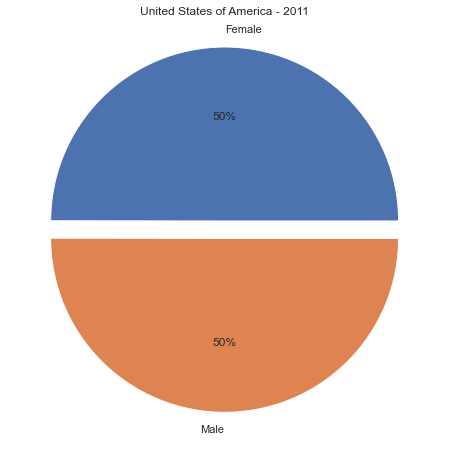

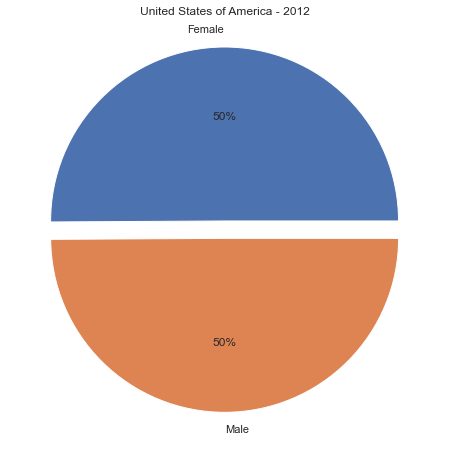

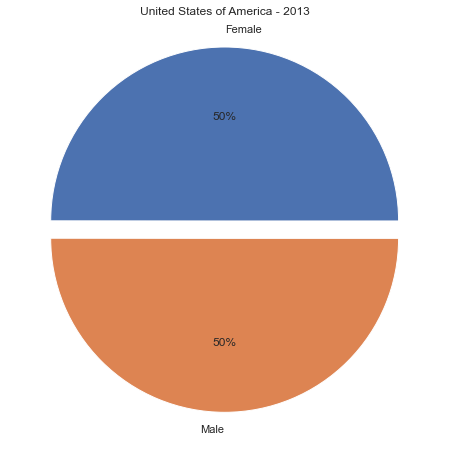

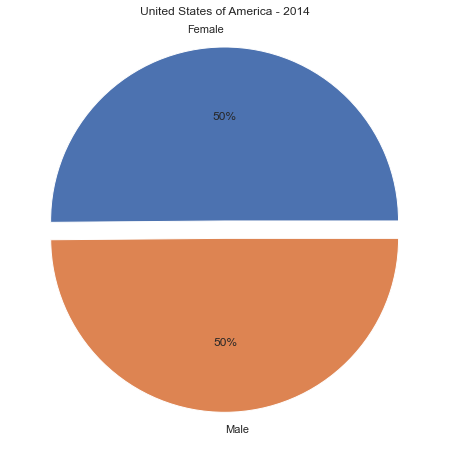

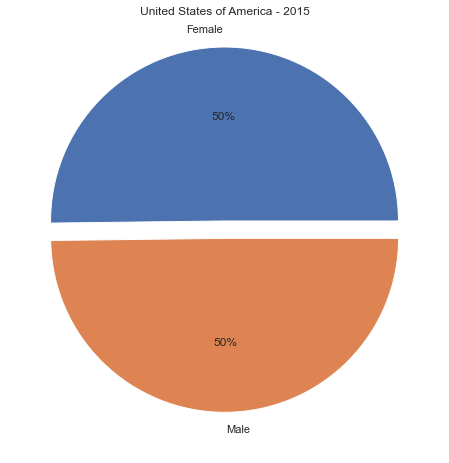

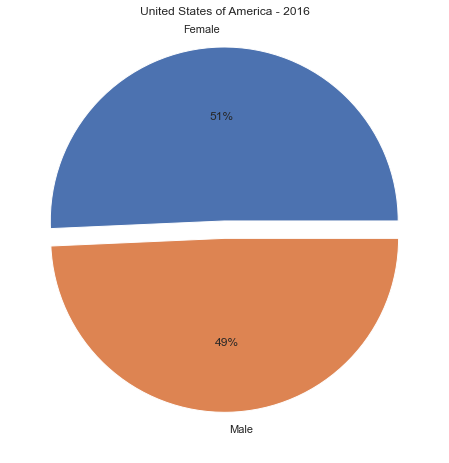

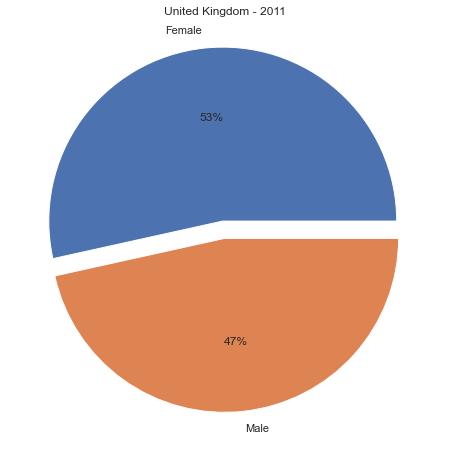

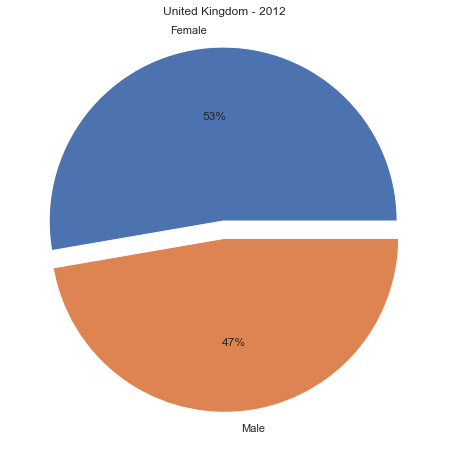

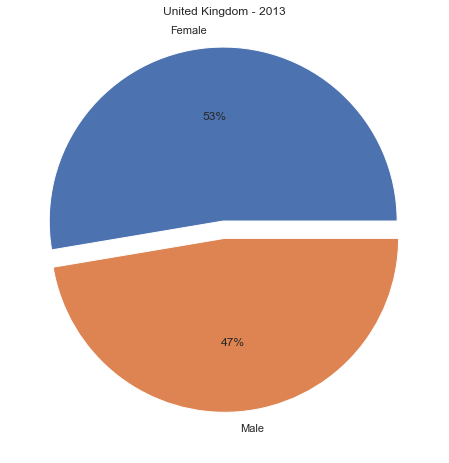

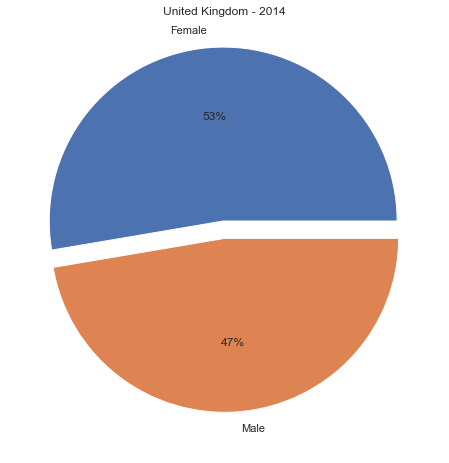

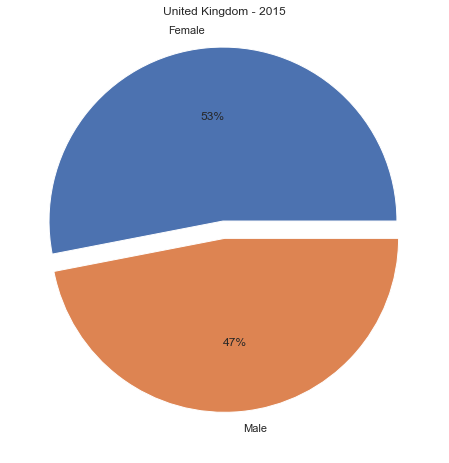

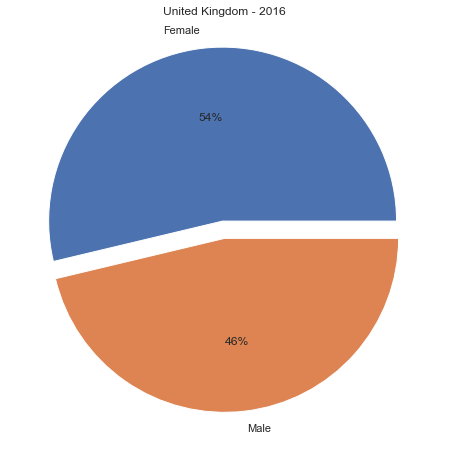

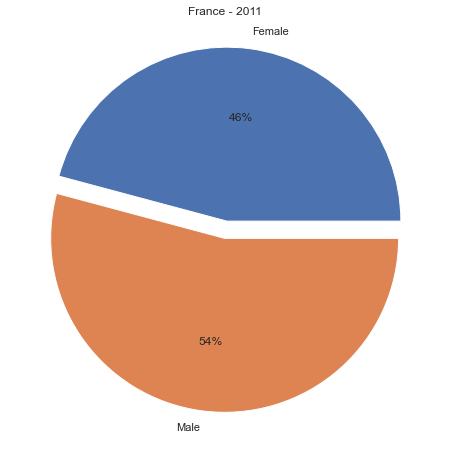

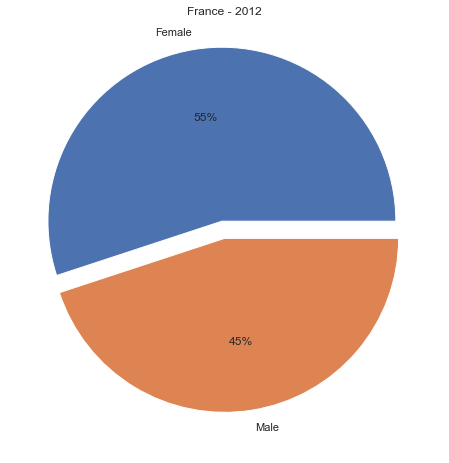

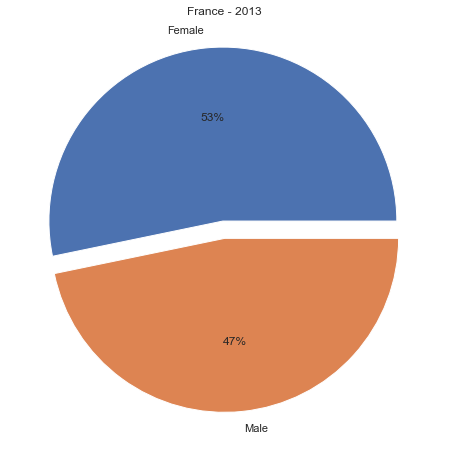

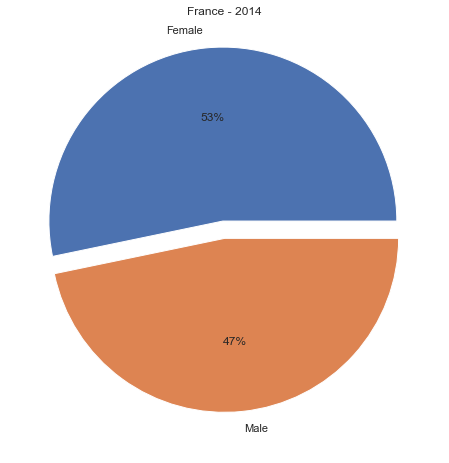

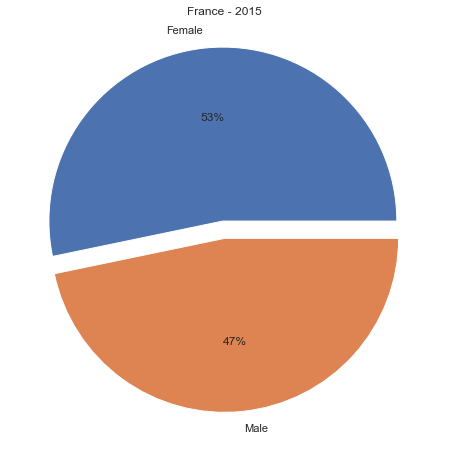

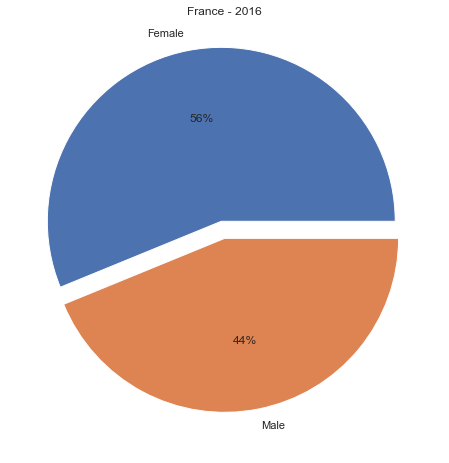

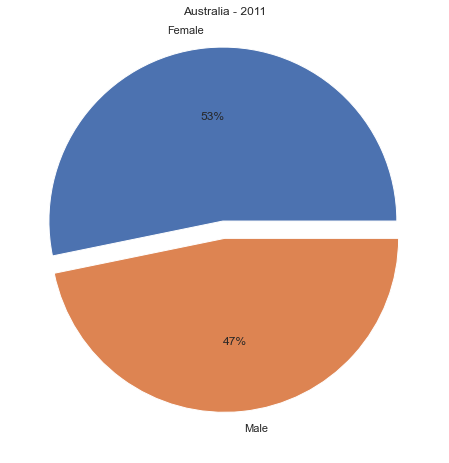

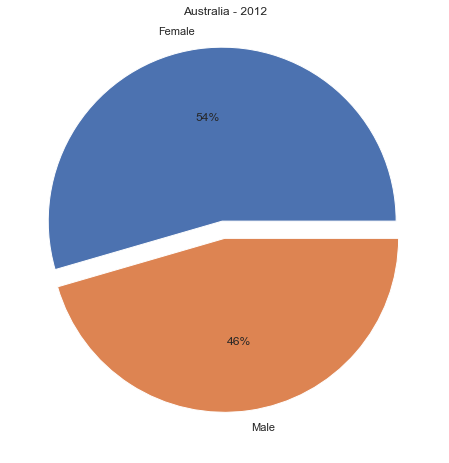

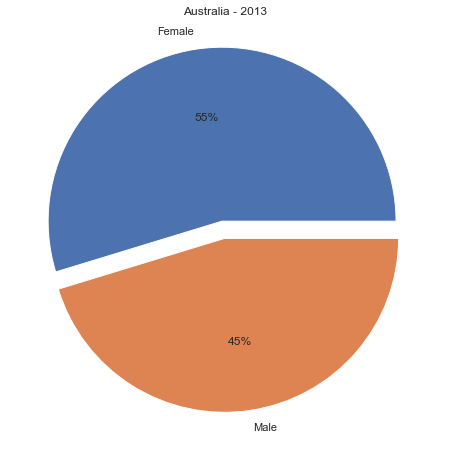

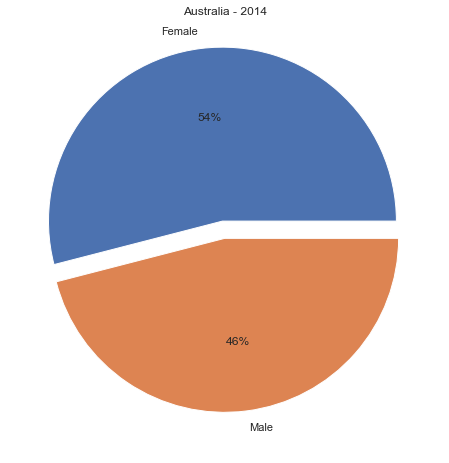

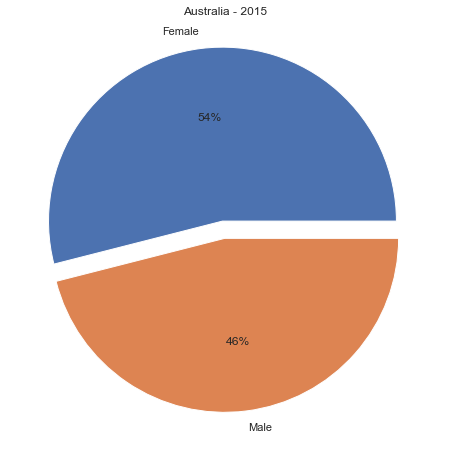

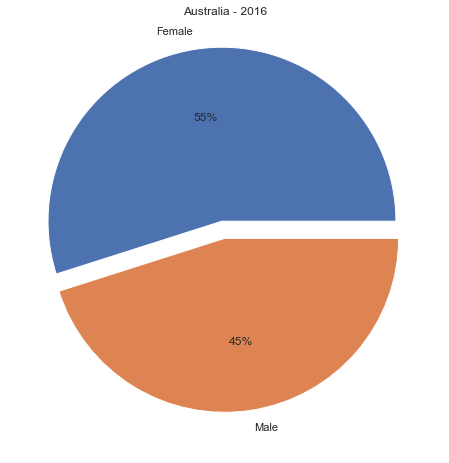

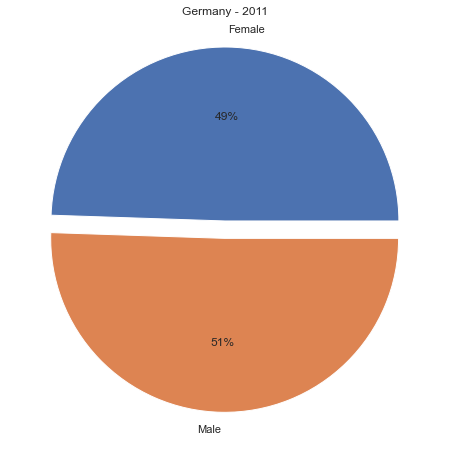

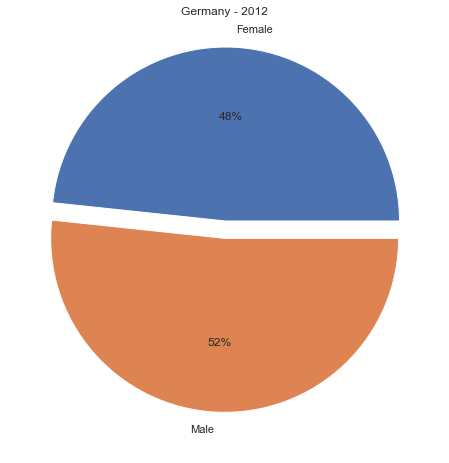

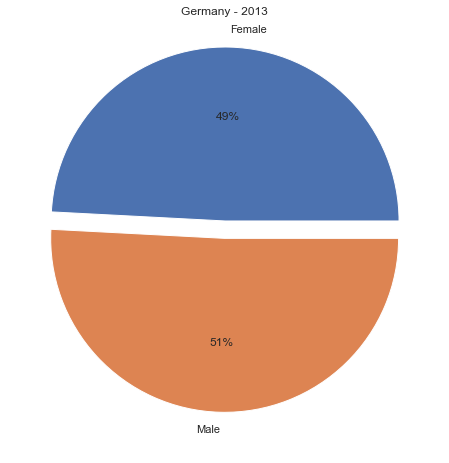

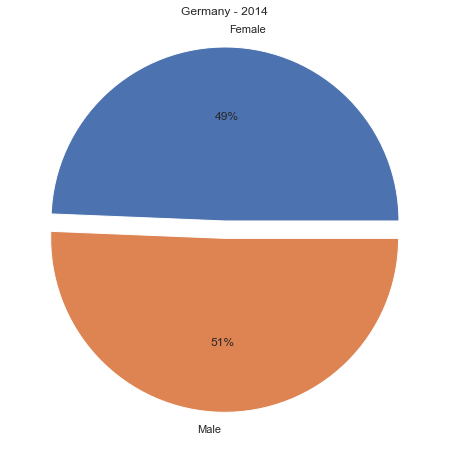

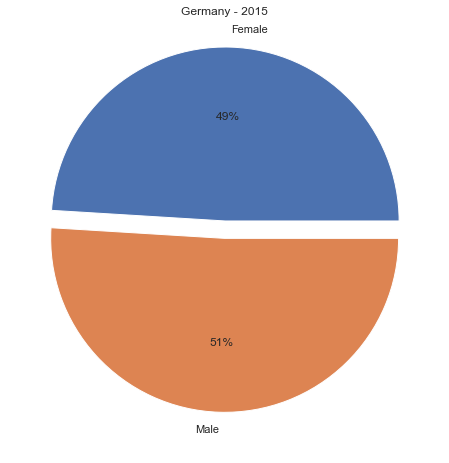

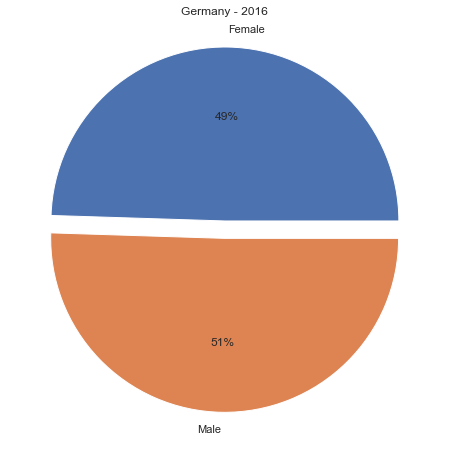

In [68]:
# Olkeler uzre male - female deyisimi PieChart

for country in sel_country:
    for year in range_year:
        year_temp_df = df[(df['country'] == country) & (df['year'] == year)]
        plot_pie([year_temp_df['female_num'].sum(),  year_temp_df['male_num'].sum()], ['Female', "Male"], country, year)

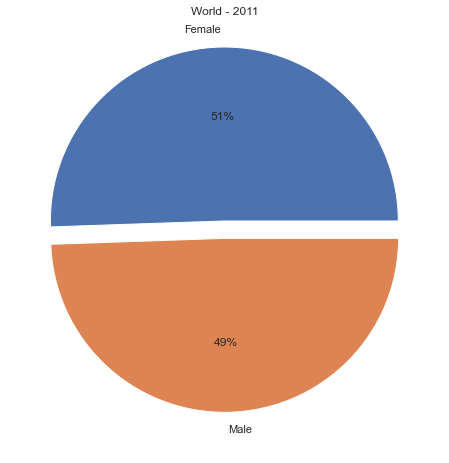

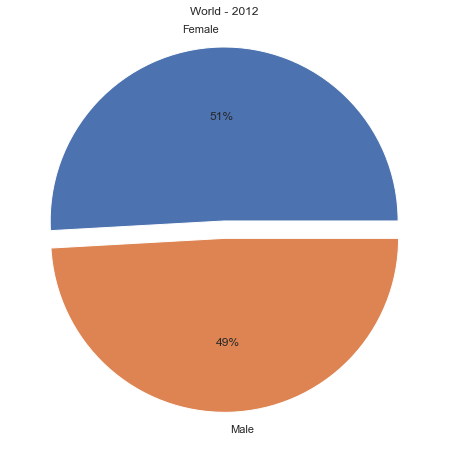

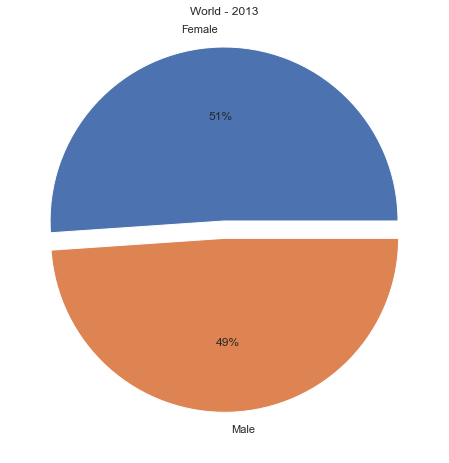

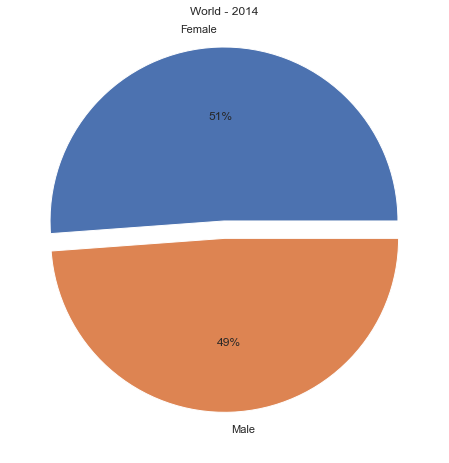

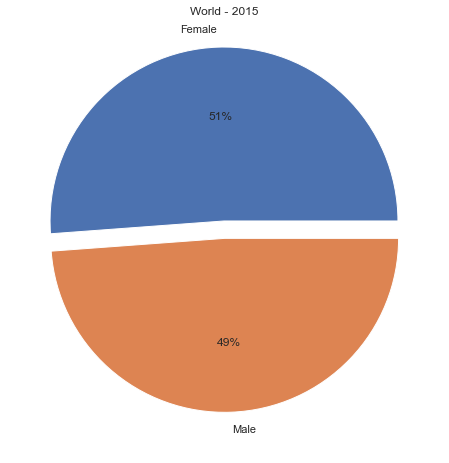

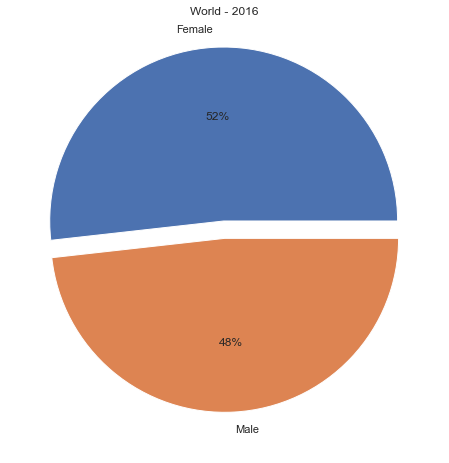

In [69]:
for year in range_year:
    yearly_df = df[df['year'] == year]
    plot_pie([yearly_df['female_num'].sum(),  yearly_df['male_num'].sum()], ['Female', "Male"],'World', year)





In [70]:
df_2016 =df[df['year'] == 2016]

df_2016_m_f = df.groupby('country')[['female_num', 'male_num']].sum()

In [71]:
male_oriented = df_2016_m_f[df_2016_m_f['female_num'] <  df_2016_m_f['male_num']]
male_oriented['dif'] = df_2016_m_f['male_num'] - df_2016_m_f['female_num']

In [72]:
female_oriented = df_2016_m_f[df_2016_m_f['female_num'] >  df_2016_m_f['male_num']]
female_oriented['dif'] = df_2016_m_f['female_num'] - df_2016_m_f['male_num']

Text(0.5, 1.0, 'Male Dominance')

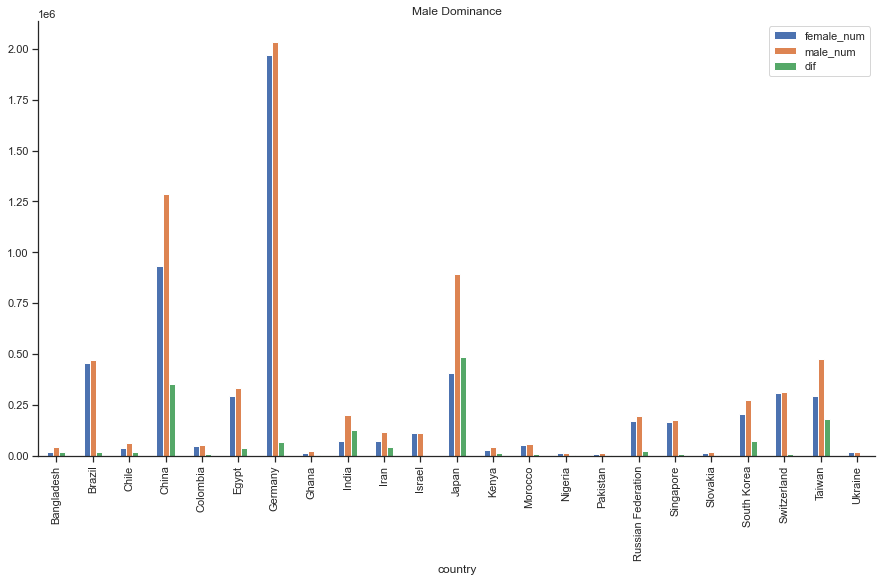

In [73]:
male_oriented.plot.bar()
plt.title('Male Dominance')

Text(0.5, 1.0, 'Female Dominance')

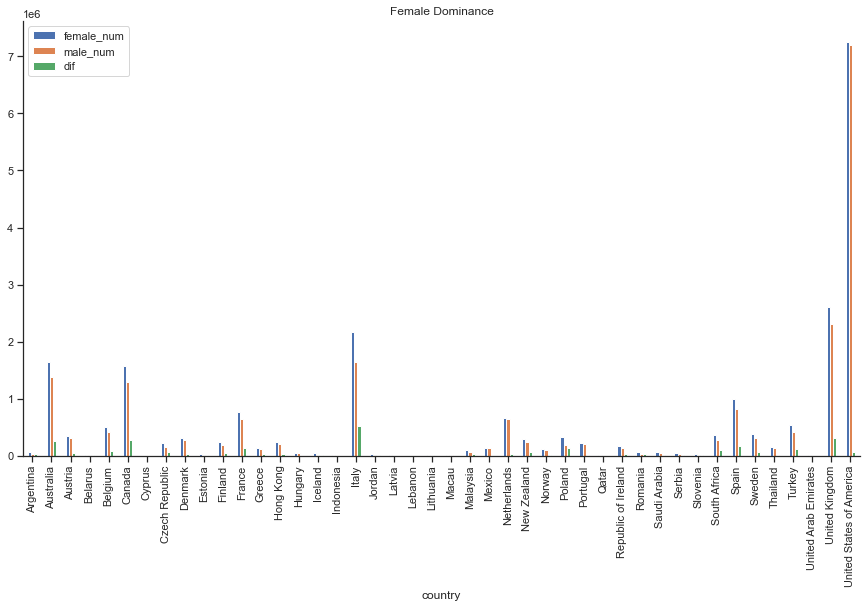

In [74]:
female_oriented.plot.bar()
plt.title('Female Dominance')